Training Accuracy: 1.0
Test Accuracy: 0.7120938628158845

Classification Report:
              precision    recall  f1-score   support

    Diabetes       0.81      0.89      0.85       588
Non-diabetes       0.62      0.58      0.60       259
 Prediabetes       0.53      0.44      0.48       261

    accuracy                           0.71      1108
   macro avg       0.65      0.64      0.64      1108
weighted avg       0.70      0.71      0.70      1108

Cross-Validation Accuracy: <built-in method mean of numpy.ndarray object at 0x000002479EDB9DD0>


<function matplotlib.pyplot.show(close=None, block=None)>

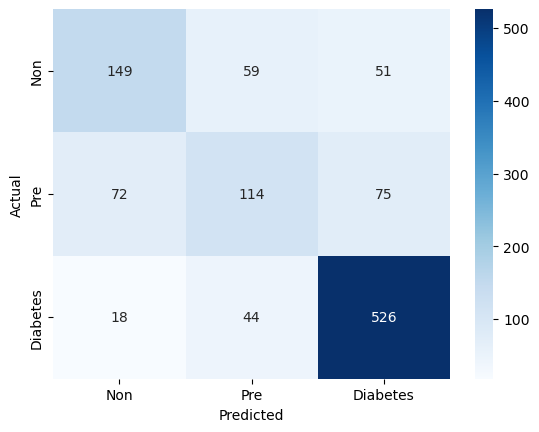

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Baca dataset (ganti path sesuai file kamu) ===
df = pd.read_csv("data_labeled.csv")

# === 2. Pilih fitur dan label ===
X = df[['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc']]
y = df['Status']

# === 3. Split data 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Training Random Forest ===
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# === 5. Evaluasi ===
y_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# === 6. Cross-validation (opsional) ===
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Non-diabetes", "Prediabetes", "Diabetes"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non", "Pre", "Diabetes"],
            yticklabels=["Non", "Pre", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show



In [4]:
pip install xgboost

  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 985.5 kB/s eta 0:00:58
    --------------------------------------- 0.8/56.8 MB 985.5 kB/s eta 0:00:57
    --------------------------------------- 1.0/56.8 MB 967.3 kB/s eta 0:00:58
    --------------------------------------- 1.3/56.8 MB 1.0 MB/s eta 0:00:56
   - -------------------------------------- 1.6/56.8 MB 1.0 MB/s eta 0:00:53
   - -------------------------------------- 1.8/56.8 MB 1.1 MB/s eta 0:00:51
   - -------------------------------------- 2.1/56.8 MB 1.1 MB/s eta 0:00:50
   - -------------------------------------- 2.4/56.8 MB 1.1 MB/s eta 0:00:48
   - -------------------------------------- 2.6/56.8 MB 1.2 MB/s eta 0:00:47
   -- ---------------

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 660774249d28a729ba8d22dd3d2c048c56e58f65a683b25ef3252e3383fe956f
             Got        dfd1f1ed8b1d38eae2c15d82ec9acf7d1b91d5334e415f45615ef4d2b40cb5b8



In [2]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 837.5 kB/s eta 0:01:08
   ---------------------------------------- 0.5/56.8 MB 837.5 kB/s eta 0:01:08
    --------------------------------------- 0.8/56.8 MB 744.7 kB/s eta 0:01:16
    --------------------------------------- 0.8/56.8 MB 744.7 kB/s eta 0:01:16
    --------------------------------------- 1.0/56.8 MB 689.2 kB/s eta 0:01:21
    --------------------------------------- 1.3/56.8 MB 762.6 kB/s eta 0:01:13
   - -------------------------------------- 1.6/56.8 MB 814.1 kB/s eta 0:01:08
   - -------------------------------------- 1.6/56.8 MB 814.1 kB/s eta 0:01:08
   - -------------

Training Accuracy: 0.9752800308999614
Test Accuracy: 0.7111969111969112

Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.83      0.89      0.86       686
Non-diabetes       0.61      0.56      0.59       302
 Prediabetes       0.51      0.47      0.48       307

    accuracy                           0.71      1295
   macro avg       0.65      0.64      0.64      1295
weighted avg       0.70      0.71      0.71      1295



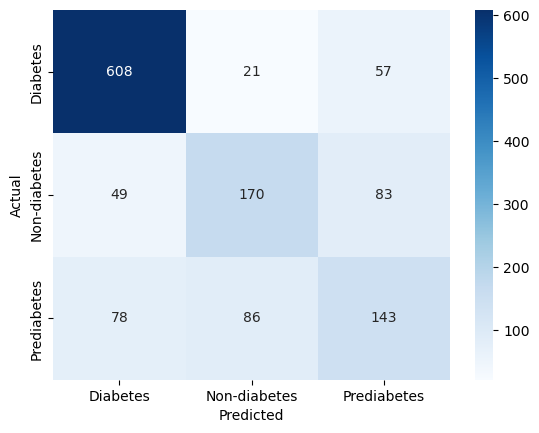

Cross-Validation Accuracy: 0.7166812153768676


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Baca dataset ===
df = pd.read_csv("data_labeled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc', 'hba1c', 'fgb']]
y = df['Status']

# === 2a. Encode label string jadi angka ===
encoder = LabelEncoder
y_encoded = encoder.fit_transform(y)

# === 3. Split data 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === 4. Training model XGBoost ===
model = XGBClassifier(
    n_estimators=300,       # jumlah pohon
    learning_rate=0.1,      # seberapa cepat model belajar
    max_depth=6,            # kedalaman pohon
    subsample=0.8,          # sampling data untuk tiap pohon
    colsample_bytree=0.8,   # sampling fitur
    random_state=42,
    eval_metric="mlogloss"
)

model.fit(X_train, y_train)

# === 5. Evaluasi ===
y_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show

# === 6. Cross Validation ===
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:43:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best CV Score: 0.7255697180378524
Test Accuracy: 0.711969111969112

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       686
           1       0.63      0.54      0.58       302
           2       0.51      0.47      0.49       307

    accuracy                           0.71      1295
   macro avg       0.65      0.63      0.64      1295
weighted avg       0.70      0.71      0.70      1295



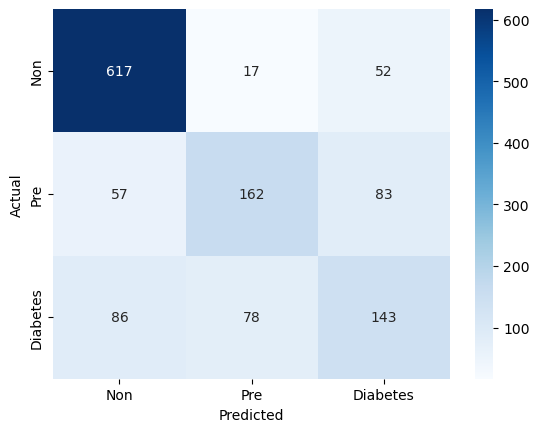

In [15]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Baca dataset ===
df = pd.read_csv("data_labeled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc']]
y = df['Status']

encoder = LabelEncoder
y_encoded = encoder.fit_transform(y)

# === 3. Split data 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y
)

# === 4. Hyperparameter tuning dengan GridSearchCV ===
param_grid = {
    "n_estimators": [100, 300, 500],       # jumlah pohon
    "max_depth": [3, 5, 7],                # kedalaman pohon
    "learning_rate": [0.01, 0.1, 0.2],     # seberapa cepat belajar
    "subsample": [0.8, 1.0],               # sampling data
    "colsample_bytree": [0.8, 1.0]         # sampling fitur
}

xgb = XGBClassifier(
    random_state=42,
    eval_metric="mlogloss",
    use_label_encoder=False
)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# === 5. Evaluasi model terbaik ===
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non", "Pre", "Diabetes"],
            yticklabels=["Non", "Pre", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show


In [1]:
import sys
!{sys.executable} -m pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 621.2 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.5 MB 621.2 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.5 MB 621.2 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 508.5 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 508.5 kB/s eta 0:00:02
   ---------------------------- ----------- 1.0/1.5 MB 513.7 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 513.7 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 513.7 kB/s eta 0:00:01
   ----------------------------

In [2]:
import sys
!{sys.executable} -m pip install catboost


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\socket.py", line 707, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^

  Using cached catboost-1.2.8-cp312-cp312-win_amd64.whl.metadata (1.5 kB)
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 419.4 kB/s eta 0:04:03
   ---------------------------------------- 0.8/102.4 MB 508.5 kB/s eta 0:03:20
   ---------------------------------------- 0.8/102.4 MB 508.5 kB/s eta 0:03:20
   ---------------------------------------- 0.8/102.4 MB 508.5 kB/s eta 0:03:20
   ---------------------------------------- 0.8/102.4 MB 508.5 kB/s eta 0:03:20
   --------------------------

In [3]:
import sys
!{sys.executable} -m pip install catboost --timeout=1000


try:
    import catboost
    print("catBoost versi:", catboost.__version__)
except ImportError:
    print("catBoost belum terinstall di kernel ini")


  Using cached catboost-1.2.8-cp312-cp312-win_amd64.whl.metadata (1.5 kB)
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 409.6 kB/s eta 0:04:09
   ---------------------------------------- 0.5/102.4 MB 409.6 kB/s eta 0:04:09
   ---------------------------------------- 0.5/102.4 MB 409.6 kB/s eta 0:04:09
   ---------------------------------------- 0.8/102.4 MB 404.2 kB/s eta 0:04:12
   ---------------------------------------- 0.8/102.4 MB 404.2 kB/s eta 0:04:12
   ---------------------------------------- 0.8/102.4 MB 404.2 kB/s eta 0:04:12
   ---------------------------------------- 1.0/102.4 MB 426.7 kB/s eta 0:03:58
   --------

In [1]:
try:
    import catboost
    print("catBoost versi:", catboost.__version__)
except ImportError:
    print("catBoost belum terinstall di kernel ini")

catBoost versi: 1.2.8


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 5178, number of used features: 5
[LightGBM] [Info] Start training from score -0.634638
[LightGBM] [Info] Start training from score -1.457110
[LightGBM] [Info] Start training from score -1.439847
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 4142, number of used features: 5
[LightGBM] [Info] Start training from score -0.634541
[LightGBM] [Info] Start training from score -1.456806
[LightGBM] [Info] Start training from score -1.440362
[LightGBM] [Info] Auto-choosing col-wise

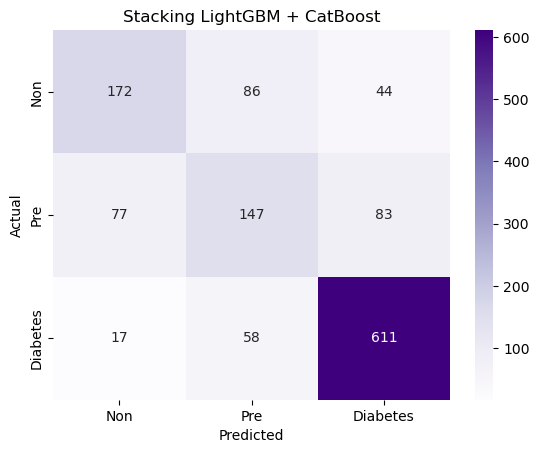

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 5178, number of used features: 5
[LightGBM] [Info] Start training from score -0.634638
[LightGBM] [Info] Start training from score -1.457110
[LightGBM] [Info] Start training from score -1.439847
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 4142, number of used features: 5
[LightGBM] [Info] Start training from score -0.634541
[LightGBM] [Info] Start training from score -1.456806
[LightGBM] [Info] Start training from score -1.440362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


# === 1. Baca dataset ===
df = pd.read_csv("data_labeled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc']]
y = df['Status']

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 3. Import models ===
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Base models
lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0
)

# Meta model (blender)
meta_model = LogisticRegression(max_iter=1000)

# Stacking Classifier
stack_model = StackingClassifier(
    estimators=[('lgbm', lgbm), ('cat', cat)],
    final_estimator=meta_model,
    cv=5,
    stack_method='predict_proba'
)

# === 4. Training ===
stack_model.fit(X_train, y_train)

# === 5. Evaluation ===
y_pred_stack = stack_model.predict(X_test)

print("🔹 Stacking (LightGBM + CatBoost)")
print("Train Accuracy:", accuracy_score(y_train, stack_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))

# Confusion Matrix
cm_stack = confusion_matrix(y_test, y_pred_stack, labels=["Non-diabetes", "Prediabetes", "Diabetes"])
sns.heatmap(cm_stack, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Non", "Pre", "Diabetes"],
            yticklabels=["Non", "Pre", "Diabetes"])
plt.title("Stacking LightGBM + CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === 6. Cross Validation ===
cv_scores = cross_val_score(
    stack_model, X, y, cv=5, scoring='accuracy'
)

print("Cross-Validation Accuracy (mean):", cv_scores.mean())
print("Cross-Validation Accuracy (all folds):", cv_scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 5178, number of used features: 5
[LightGBM] [Info] Start training from score -0.634638
[LightGBM] [Info] Start training from score -1.457110
[LightGBM] [Info] Start training from score -1.439847
🔹 LightGBM
Train Accuracy: 0.9971031286210892
Test Accuracy: 0.7181467181467182

Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.83      0.89      0.86       686
Non-diabetes       0.64      0.57      0.60       302
 Prediabetes       0.51      0.49      0.50       307

    accuracy                           0.72      1295
   macro avg       0.66      0.65      0.65      1295
weighted avg       0.71      0.72      0.71      1295

🔹 CatBoost
Train Accuracy: 0.8001158748551565
Test Accuracy: 0.717

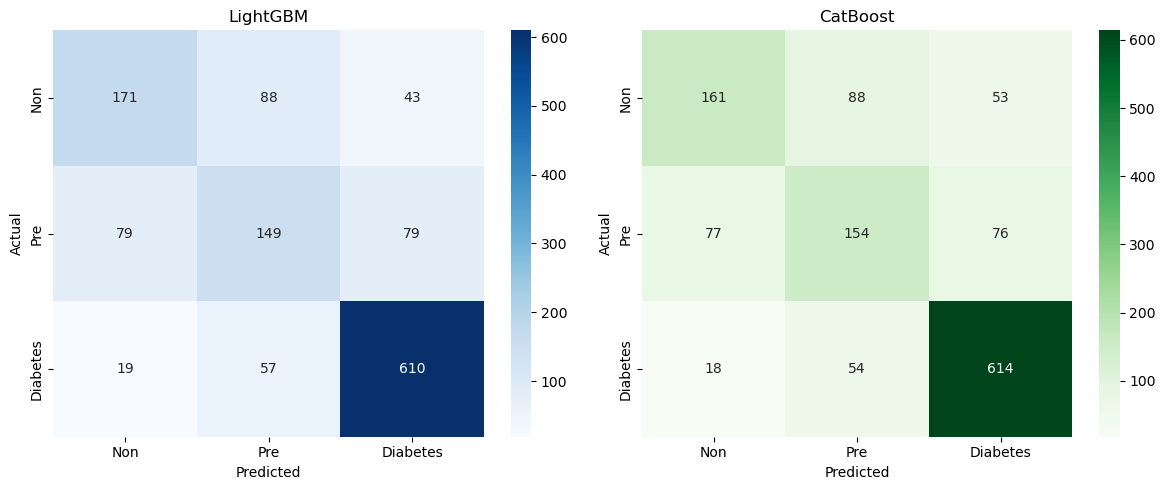

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Baca dataset ===
df = pd.read_csv("data_labeled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc']]
y = df['Status']

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 3. LightGBM ===
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("🔹 LightGBM")
print("Train Accuracy:", accuracy_score(y_train, lgbm.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))

# === 4. CatBoost ===
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0
)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

print("🔹 CatBoost")
print("Train Accuracy:", accuracy_score(y_train, cat.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_cat))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat))

# === 5. Confusion Matrix (LightGBM vs CatBoost) ===
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm, labels=["Non-diabetes", "Prediabetes", "Diabetes"])
sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap="Blues", ax=ax[0],
            xticklabels=["Non", "Pre", "Diabetes"],
            yticklabels=["Non", "Pre", "Diabetes"])
ax[0].set_title("LightGBM")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

cm_cat = confusion_matrix(y_test, y_pred_cat, labels=["Non-diabetes", "Prediabetes", "Diabetes"])
sns.heatmap(cm_cat, annot=True, fmt="d", cmap="Greens", ax=ax[1],
            xticklabels=["Non", "Pre", "Diabetes"],
            yticklabels=["Non", "Pre", "Diabetes"])
ax[1].set_title("CatBoost")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder

# === 1. Baca dataset ===
df = pd.read_csv("data_labeled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc']]
y = df['Status']

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# === 3. Definisi model ===
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="mlogloss",
    use_label_encoder=False
)

lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0
)

stack_model = StackingClassifier(
    estimators=[('lgbm', lgbm), ('cat', cat)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    stack_method='predict_proba'
)

# === 4. Cross Validation untuk semua model ===
models = {
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "CatBoost": cat,
    "Stacking (LGBM+CatBoost)": stack_model
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y_encoded, cv=5, scoring="accuracy")
    cv_results[name] = (scores.mean(), scores)

# === 5. Print hasil ===
print("=== Cross Validation Results (5-Fold) ===")
for name, (mean_score, scores) in cv_results.items():
    print(f"{name}: Mean={mean_score:.4f}, Scores={scores}")


c:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:05:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:05:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:05:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:05:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 5178, number of used features: 5
[LightGBM] [Info] Start training from score -0.634638
[LightGBM] [Info] Start training from score -1.457110
[LightGBM] [Info] Start training from score -1.439847
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 5178, number of used features: 5
[LightGBM] [Info] Start training from score -0.634638
[LightGBM] [Info] Start training from score -1.457110
[LightGBM] [Info] Start training from score -1.439847
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.


PENAMBAHAN HDL

Training Accuracy: 1.0
Test Accuracy: 0.7220216606498195

Classification Report:
              precision    recall  f1-score   support

    Diabetes       0.81      0.90      0.85       588
Non-diabetes       0.63      0.62      0.62       259
 Prediabetes       0.56      0.42      0.48       261

    accuracy                           0.72      1108
   macro avg       0.66      0.65      0.65      1108
weighted avg       0.71      0.72      0.71      1108



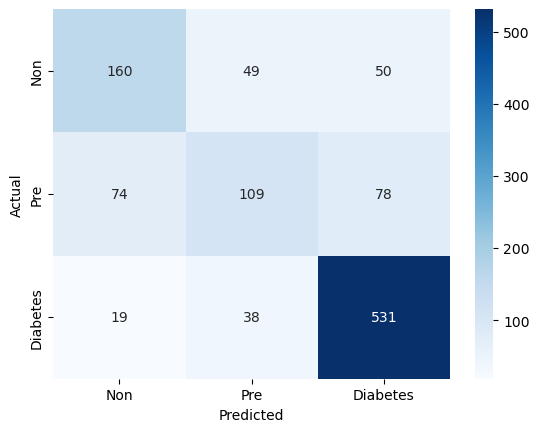

Cross-Validation Accuracy: 0.7085778781038374


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Baca dataset (ganti path sesuai file kamu) ===
df = pd.read_csv("data_labeled.csv", delimiter = ";")

# === 2. Pilih fitur dan label ===
X = df[['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc', 'hdl']]
y = df['Status']

# === 3. Split data 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Training Random Forest ===
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# === 5. Evaluasi ===
y_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Non-diabetes", "Prediabetes", "Diabetes"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non", "Pre", "Diabetes"],
            yticklabels=["Non", "Pre", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === 6. Cross-validation (opsional) ===
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1033
[LightGBM] [Info] Number of data points in the train set: 4430, number of used features: 6
[LightGBM] [Info] Start training from score -0.632708
[LightGBM] [Info] Start training from score -1.453032
[LightGBM] [Info] Start training from score -1.448218
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 3544, number of used features: 6
[LightGBM] [Info] Start training from score -0.632921
[LightGBM] [Info] Start training from score -1.452791
[LightGBM] [Info] Start training from score -1.447978
[LightGBM] [Info] Auto-choosing col-wis

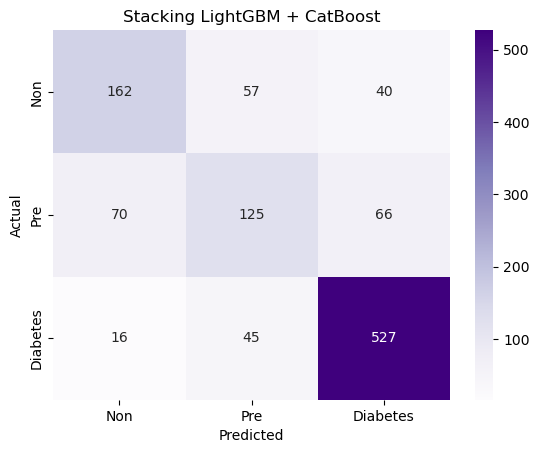

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 4430, number of used features: 6
[LightGBM] [Info] Start training from score -0.632708
[LightGBM] [Info] Start training from score -1.453032
[LightGBM] [Info] Start training from score -1.448218
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 3544, number of used features: 6
[LightGBM] [Info] Start training from score -0.632390
[LightGBM] [Info] Start training from score -1.452791
[LightGBM] [Info] Start training from score -1.449179
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


# === 1. Baca dataset ===
df = pd.read_csv("data_labeled.csv", delimiter=";")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc','hdl']]
y = df['Status']

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 3. Import models ===
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Base models
lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0
)

# Meta model (blender)
meta_model = LogisticRegression(max_iter=1000)

# Stacking Classifier
stack_model = StackingClassifier(
    estimators=[('lgbm', lgbm), ('cat', cat)],
    final_estimator=meta_model,
    cv=5,
    stack_method='predict_proba'
)

# === 4. Training ===
stack_model.fit(X_train, y_train)

# === 5. Evaluation ===
y_pred_stack = stack_model.predict(X_test)

print("🔹 Stacking (LightGBM + CatBoost)")
print("Train Accuracy:", accuracy_score(y_train, stack_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))

# Confusion Matrix
cm_stack = confusion_matrix(y_test, y_pred_stack, labels=["Non-diabetes", "Prediabetes", "Diabetes"])
sns.heatmap(cm_stack, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Non", "Pre", "Diabetes"],
            yticklabels=["Non", "Pre", "Diabetes"])
plt.title("Stacking LightGBM + CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === 6. Cross Validation ===
cv_scores = cross_val_score(
    stack_model, X, y, cv=5, scoring='accuracy'
)

print("Cross-Validation Accuracy (mean):", cv_scores.mean())
print("Cross-Validation Accuracy (all folds):", cv_scores)

TRAINING ULANG

Training Accuracy: 1.0
Test Accuracy: 0.7098821396192203

Classification Report:
              precision    recall  f1-score   support

    Diabetes       0.80      0.88      0.84       584
Non-diabetes       0.65      0.57      0.61       259
 Prediabetes       0.51      0.46      0.48       260

    accuracy                           0.71      1103
   macro avg       0.66      0.64      0.64      1103
weighted avg       0.70      0.71      0.70      1103



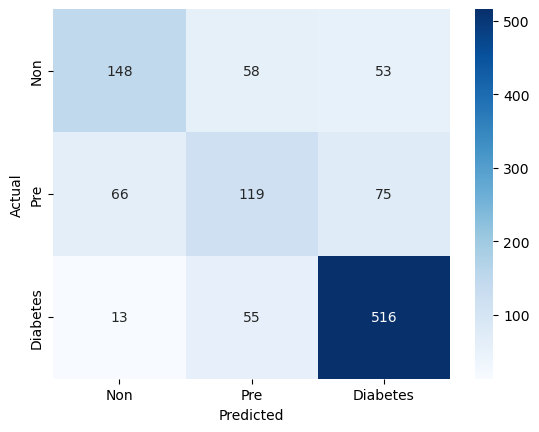

Cross-Validation Accuracy: 0.7077765194412986


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Baca dataset (ganti path sesuai file kamu) ===
df = pd.read_csv("data_scaled.csv", delimiter = ",")

# === 2. Pilih fitur dan label ===
X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 'avg_dystolyc', 'hdl']]
y = df['Status']

# === 3. Split data 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Training Random Forest ===
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# === 5. Evaluasi ===
y_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Non-diabetes", "Prediabetes", "Diabetes"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non", "Pre", "Diabetes"],
            yticklabels=["Non", "Pre", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === 6. Cross-validation (opsional) ===
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1013
[LightGBM] [Info] Number of data points in the train set: 4411, number of used features: 6
[LightGBM] [Info] Start training from score -0.635233
[LightGBM] [Info] Start training from score -1.449700
[LightGBM] [Info] Start training from score -1.445843
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 3528, number of used features: 6
[LightGBM] [Info] Start training from score -0.635328
[LightGBM] [Info] Start training from score -1.449473
[LightGBM] [Info] Start training from score -1.445857
[LightGBM] [Info] Auto-choosing col-wis

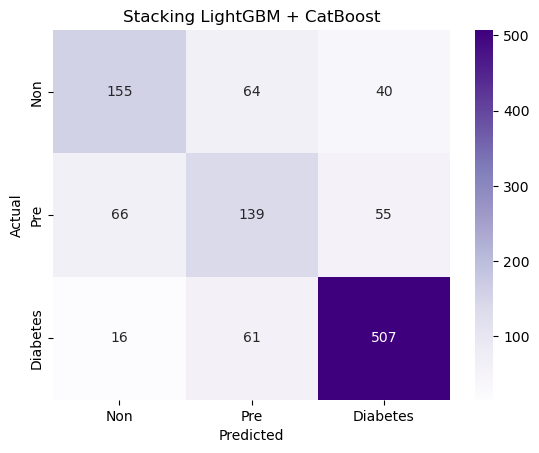

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 4411, number of used features: 6
[LightGBM] [Info] Start training from score -0.635233
[LightGBM] [Info] Start training from score -1.449700
[LightGBM] [Info] Start training from score -1.445843
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 3528, number of used features: 6
[LightGBM] [Info] Start training from score -0.635328
[LightGBM] [Info] Start training from score -1.449473
[LightGBM] [Info] Start training from score -1.445857
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


# === 1. Baca dataset ===
df = pd.read_csv("data_scaled.csv", delimiter=",")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc','hdl']]
y = df['Status']

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 3. Import models ===
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Base models
lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0
)

# Meta model (blender)
meta_model = LogisticRegression(max_iter=1000)

# Stacking Classifier
stack_model = StackingClassifier(
    estimators=[('lgbm', lgbm), ('cat', cat)],
    final_estimator=meta_model,
    cv=5,
    stack_method='predict_proba'
)

# === 4. Training ===
stack_model.fit(X_train, y_train)

# === 5. Evaluation ===
y_pred_stack = stack_model.predict(X_test)

print("🔹 Stacking (LightGBM + CatBoost)")
print("Train Accuracy:", accuracy_score(y_train, stack_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))

# Confusion Matrix
cm_stack = confusion_matrix(y_test, y_pred_stack, labels=["Non-diabetes", "Prediabetes", "Diabetes"])
sns.heatmap(cm_stack, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Non", "Pre", "Diabetes"],
            yticklabels=["Non", "Pre", "Diabetes"])
plt.title("Stacking LightGBM + CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === 6. Cross Validation ===
cv_scores = cross_val_score(
    stack_model, X, y, cv=5, scoring='accuracy'
)

print("Cross-Validation Accuracy (mean):", cv_scores.mean())
print("Cross-Validation Accuracy (all folds):", cv_scores)

In [13]:
# ===============================
# RANDOM FOREST WITH HYPERPARAMETER TUNING
# ===============================

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import randint

# --- 1. Load data ---
df = pd.read_csv("data_scaled.csv")
print("Contoh data:")
print(df.head(7))

# --- 2. Pilih fitur dan label ---
X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 'avg_dystolyc', 'hdl']]
y = df['Status']  # target diubah sesuai kolom kamu

# --- 3. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# --- 4. Definisikan model Random Forest ---
rf = RandomForestClassifier(random_state=42)

# --- 5. Tentukan space hyperparameter untuk tuning ---
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# --- 6. RandomizedSearchCV ---
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# --- 7. Latih model dengan tuning ---
random_search.fit(X_train, y_train)

print("\n=== Best Hyperparameters ===")
print(random_search.best_params_)

# --- 8. Prediksi dengan model terbaik ---
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# --- 9. Evaluasi model ---
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


Contoh data:
       SEQN     berat    tinggi       BMI       age   fgb  hba1c  insulin  \
0  130378.0  0.319298  0.903448 -0.087273 -0.257143  6.27    5.6    93.18   
1  130379.0  0.842105  0.537931  0.648951  0.400000  5.50    5.6   119.46   
2  130380.0 -0.294737 -0.931034  0.217063 -0.228571  8.66    6.2    97.98   
3  130386.0  0.449123  0.475862  0.270769 -0.514286  5.55    5.1    68.28   
4  130387.0  0.901754 -0.724138  1.659301  0.457143  5.90  136.0    74.00   
5  130390.0  1.575439 -0.213793  2.043077 -0.600000  5.90  106.0    78.00   
6  130391.0  1.350877  0.441379  1.253147 -0.542857  5.40  104.0    74.00   

   avg_systolyc  avg_dystolyc       hdl        Status  insulin_log  
0      0.659091      1.419355 -0.409091   Prediabetes     0.599974  
1     -0.090909      0.193548  0.477273  Non-diabetes     1.123916  
2     -0.409091      0.322581 -0.159091      Diabetes     0.705801  
3      0.022727      0.096774 -0.340909  Non-diabetes    -0.053707  
4      1.272727      0.32

Training Accuracy: 0.9850374064837906
Test Accuracy: 0.6953762466001813

Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.81      0.87      0.84       584
Non-diabetes       0.62      0.55      0.58       259
 Prediabetes       0.48      0.45      0.47       260

    accuracy                           0.70      1103
   macro avg       0.64      0.62      0.63      1103
weighted avg       0.69      0.70      0.69      1103



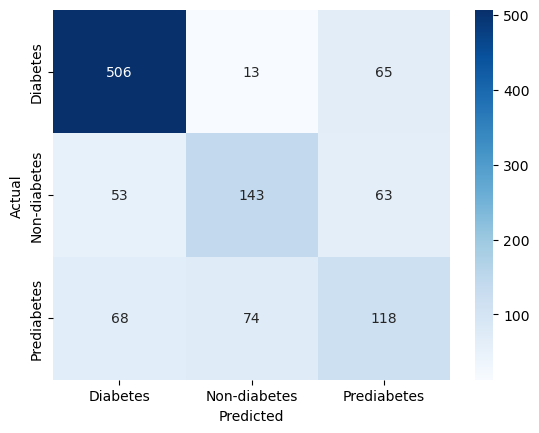

Cross-Validation Accuracy: 0.7059622036810194


In [16]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Baca dataset ===
df = pd.read_csv("data_scaled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 'avg_dystolyc']]
y = df['Status']

# === 2a. Encode label string jadi angka ===
encoder = LabelEncoder()   # ← harus ada ()
y_encoded = encoder.fit_transform(y)

# === 3. Split data 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === 4. Training model XGBoost ===
model = XGBClassifier(
    n_estimators=300,       
    learning_rate=0.1,      
    max_depth=6,            
    subsample=0.8,          
    colsample_bytree=0.8,   
    random_state=42,
    eval_metric="mlogloss"
)

model.fit(X_train, y_train)

# === 5. Evaluasi ===
y_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()   # ← harus ada ()

# === 6. Cross Validation ===
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy: 0.8900476082520971
Test Accuracy: 0.7153218495013599

Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.82      0.87      0.84       584
Non-diabetes       0.64      0.57      0.60       259
 Prediabetes       0.53      0.52      0.52       260

    accuracy                           0.72      1103
   macro avg       0.66      0.65      0.66      1103
weighted avg       0.71      0.72      0.71      1103



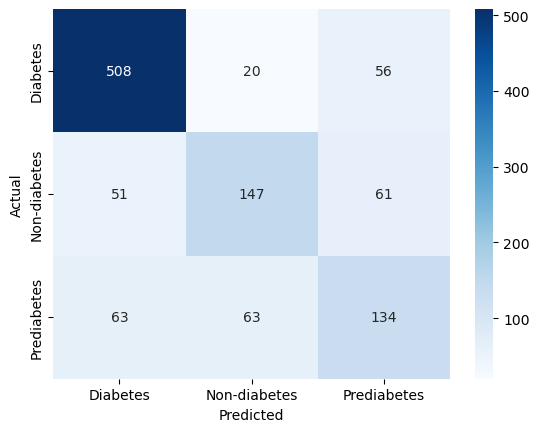

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

Cross-Validation Accuracy: 0.7170681787248686


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("data_scaled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 'avg_dystolyc']]
y = df['Status']

# === 2a. Encode label string jadi angka ===
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# === 3. Split data train/test 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === 4. Definisikan base learners ===
base_learners = [
    ('rf', RandomForestClassifier(
        n_estimators=200, max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42, eval_metric='mlogloss'))
]

# === 5. Definisikan meta-learner (stacking) ===
# Logistic Regression sebagai meta learner
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(multi_class='multinomial', max_iter=1000),
    cv=5,
    n_jobs=-1
)

# === 6. Latih stacking model ===
stack_model.fit(X_train, y_train)

# === 7. Prediksi ===
y_pred = stack_model.predict(X_test)

# === 8. Evaluasi ===
print("Training Accuracy:", accuracy_score(y_train, stack_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === 9. Cross-Validation Accuracy ===
cv_scores = cross_val_score(stack_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten
from tensorflow.keras.utils import to_categorical

# === 1. Load data ===
df = pd.read_csv("data_scaled.csv")

X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 'avg_dystolyc']].values
y = df['Status'].values

# === 2. Encode label & one-hot (untuk CNN-LSTM) ===
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# === 3. Scaling fitur ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. Reshape untuk CNN-LSTM (samples, timesteps, features) ===
# Karena tabular, kita bisa pakai timesteps=1
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# === 5. Split train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === 6. Bangun model CNN-LSTM untuk ekstraksi fitur ===
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
cnn_lstm_model.add(LSTM(32, return_sequences=False))
cnn_lstm_model.add(Dense(16, activation='relu'))
cnn_lstm_model.add(Flatten())  # hasil vector fitur

# === 7. Ekstraksi fitur dari CNN-LSTM ===
cnn_lstm_model.compile(optimizer='adam', loss='mse')  # dummy loss karena kita hanya ekstraksi
features_train = cnn_lstm_model.predict(X_train)
features_test = cnn_lstm_model.predict(X_test)

# === 8. Gunakan SVM sebagai classifier ===
svm_clf = SVC(kernel='rbf', probability=True)
svm_clf.fit(features_train, y_train)

# === 9. Prediksi & evaluasi ===
y_pred = svm_clf.predict(features_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test Accuracy: 0.828649138712602

Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.99      0.92      0.95       584
Non-diabetes       0.77      0.66      0.71       259
 Prediabetes       0.61      0.79      0.69       260

    accuracy                           0.83      1103
   macro avg       0.79      0.79      0.78      1103
weighted avg       0.85      0.83      0.83      1103



138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Best Hyperparameters ===
{'C': 7.41993941811405, 'gamma': 'scale', 'kernel': 'rbf'}
Training Accuracy: 0.8725912491498526
Test Accuracy: 0.843155031731641

Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.97      0.93      0.95       584
Non-diabetes       0.76      0.76      0.76       259
 Prediabetes       0.66      0.72      0.69       260

    accuracy                           0.84      1103
   macro avg       0.80      0.80      0.80      1103
weighted avg       0.85      0.84      0.85      1103



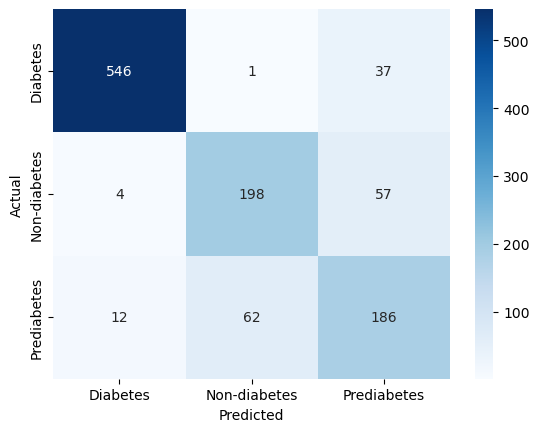

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Input
from scipy.stats import uniform
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("data_scaled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 'avg_dystolyc']].values
y = df['Status'].values

# === 3. Encode label & scale fitur ===
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. Reshape untuk CNN-LSTM (samples, timesteps, features) ===
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# === 5. Split train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === 6. CNN-LSTM Feature Extractor (fixed) ===
cnn_lstm_model = Sequential([
    Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2])),
    Conv1D(filters=32, kernel_size=1, activation='relu'),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Flatten()
])

cnn_lstm_model.compile(optimizer='adam', loss='mse')  # dummy loss, hanya untuk feature extraction

# Ekstraksi fitur
features_train = cnn_lstm_model.predict(X_train)
features_test = cnn_lstm_model.predict(X_test)

# === 7. Hyperparameter tuning SVM ===
param_dist = {
    'C': uniform(0.1, 10),
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svm_clf = SVC(probability=True)
random_search = RandomizedSearchCV(
    svm_clf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# === 8. Train SVM dengan tuning ===
random_search.fit(features_train, y_train)

print("\n=== Best Hyperparameters ===")
print(random_search.best_params_)

# === 9. Prediksi & evaluasi ===
best_svm = random_search.best_estimator_

# Training Accuracy
y_train_pred = best_svm.predict(features_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# Test Accuracy
y_pred = best_svm.predict(features_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 648 candidates, totalling 3240 fits

=== Best Hyperparameters ===
{'bootstrap': True, 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy: 0.9059170256177738
Test Accuracy: 0.6962828649138713

Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.81      0.86      0.84       584
Non-diabetes       0.60      0.57      0.59       259
 Prediabetes       0.49      0.46      0.47       260

    accuracy                           0.70      1103
   macro avg       0.64      0.63      0.63      1103
weighted avg       0.69      0.70      0.69      1103



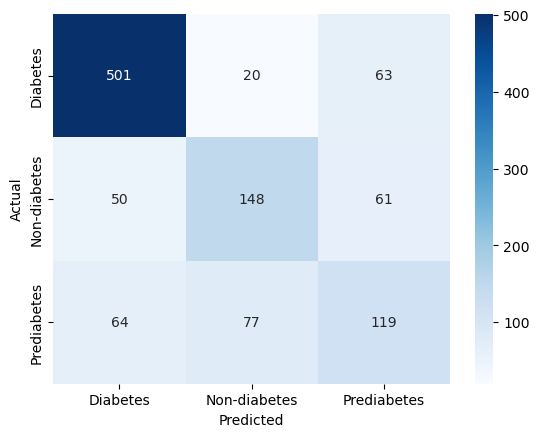

Cross-Validation Accuracy: 0.7170702331517733


In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("data_scaled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 'avg_dystolyc']]
y = df['Status']

# === 2a. Encode label ===
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# === 3. Scaling fitur (opsional tapi bisa tetap dilakukan) ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. Split train/test 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === 5. Definisikan Random Forest dan GridSearchCV ===
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

# === 6. Latih model dengan tuning ===
grid_search.fit(X_train, y_train)

print("\n=== Best Hyperparameters ===")
print(grid_search.best_params_)

# === 7. Prediksi & evaluasi ===
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, best_rf.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Cross-Validation Accuracy
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fitting 5 folds for each of 30 candidates, totalling 150 fits

=== Best Hyperparameters ===
{'C': 8.387375091519294, 'coef0': 0.3567533266935893, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Training Accuracy: 0.8766719564724552
Test Accuracy: 0.8476881233000907

Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.96      0.93      0.95       584
Non-diabetes       0.77      0.76      0.76       259
 Prediabetes       0.69      0.74      0.72       260

    accuracy                           0.85      1103
   macro avg       0.81      0.81      0.81      1103
weighted avg       0.85      0.85      0.85      1103



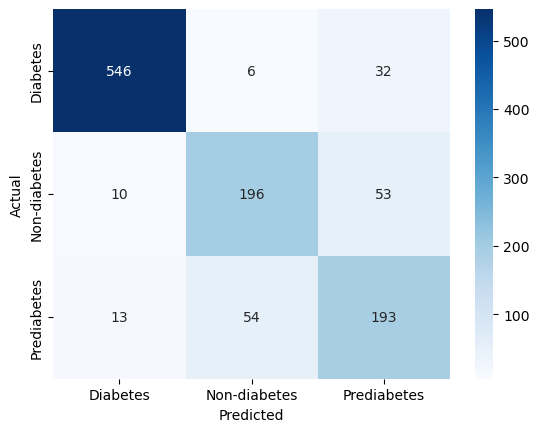

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Input
from scipy.stats import uniform, randint
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("data_scaled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 'avg_dystolyc']].values
y = df['Status'].values

# === 3. Encode label & scale fitur ===
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. Reshape untuk CNN-LSTM (samples, timesteps, features) ===
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# === 5. Split train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === 6. CNN-LSTM Feature Extractor (fixed) ===
cnn_lstm_model = Sequential([
    Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2])),
    Conv1D(filters=32, kernel_size=1, activation='relu'),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Flatten()
])

cnn_lstm_model.compile(optimizer='adam', loss='mse')  # dummy loss, hanya untuk feature extraction

# Ekstraksi fitur
features_train = cnn_lstm_model.predict(X_train)
features_test = cnn_lstm_model.predict(X_test)

# === 7. Hyperparameter tuning semua SVM parameter ===
param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 1, 5)),
    'degree': randint(2, 5),
    'coef0': uniform(0, 1)
}

svm_clf = SVC(probability=True)
random_search = RandomizedSearchCV(
    svm_clf,
    param_distributions=param_dist,
    n_iter=30,   # jumlah iterasi random
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# === 8. Train SVM dengan tuning ===
random_search.fit(features_train, y_train)

print("\n=== Best Hyperparameters ===")
print(random_search.best_params_)

# === 9. Prediksi & evaluasi ===
best_svm = random_search.best_estimator_

# Training Accuracy
y_train_pred = best_svm.predict(features_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# Test Accuracy
y_pred = best_svm.predict(features_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 30 candidates, totalling 150 fits

=== Best Hyperparameters ===
{'rf__max_depth': 9, 'rf__min_samples_split': 2, 'rf__n_estimators': 121, 'svm__C': 4.594506741382034, 'svm__gamma': 'scale', 'svm__kernel': 'sigmoid', 'xgb__colsample_bytree': 0.7243929286862649, 'xgb__learning_rate': 0.1075549966080241, 'xgb__max_depth': 5, 'xgb__n_estimators': 221, 'xgb__subsample': 0.8550229885420852}
Training Accuracy: 0.8070732260258445
Test Accuracy: 0.7107887579329103

Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.82      0.86      0.84       584
Non-diabetes       0.63      0.59      0.61       259
 Prediabetes       0.52      0.50      0.51       260

    accuracy                           0.71      1103
   macro avg       0.66      0.65      0.65      1103
weighted avg       0.70      0.71      0.71      1103



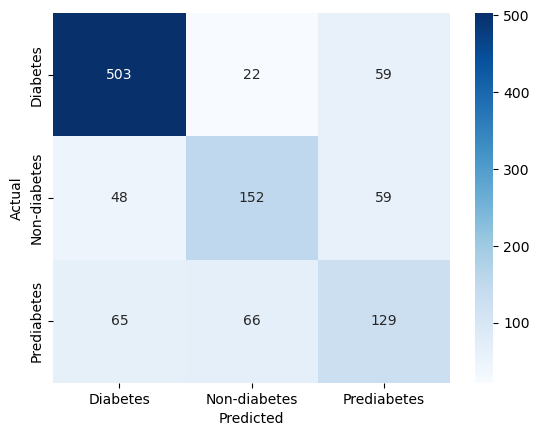

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.stats import uniform, randint
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("data_scaled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 'avg_dystolyc']].values
y = df['Status'].values

# === 3. Encode label & scale fitur ===
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. Split train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === 5. Definisikan base learners dengan placeholder hyperparameter ===
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
svm = SVC(probability=True, random_state=42)

base_learners = [
    ('rf', rf),
    ('xgb', xgb),
    ('svm', svm)
]

meta_learner = LogisticRegression(max_iter=500)

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    passthrough=True,
    n_jobs=-1
)

# === 6. Hyperparameter space untuk RandomizedSearchCV ===
param_dist = {
    # Random Forest
    'rf__n_estimators': randint(50, 300),
    'rf__max_depth': randint(3, 10),
    'rf__min_samples_split': randint(2, 5),

    # XGBoost
    'xgb__n_estimators': randint(50, 300),
    'xgb__max_depth': randint(3, 10),
    'xgb__learning_rate': uniform(0.01, 0.3),
    'xgb__subsample': uniform(0.6, 0.4),
    'xgb__colsample_bytree': uniform(0.6, 0.4),

    # SVM
    'svm__C': uniform(0.1, 10),
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['rbf', 'poly', 'sigmoid']
}

# === 7. RandomizedSearchCV ===
random_search = RandomizedSearchCV(
    stack_model,
    param_distributions=param_dist,
    n_iter=30,  # iterasi random
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# === 8. Train model ===
random_search.fit(X_train, y_train)

print("\n=== Best Hyperparameters ===")
print(random_search.best_params_)

# === 9. Evaluate ===
best_stack = random_search.best_estimator_

# Training Accuracy
y_train_pred = best_stack.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# Test Accuracy
y_pred = best_stack.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Best Hyperparameters ===
{'C': 7.41993941811405, 'gamma': 'scale', 'kernel': 'rbf'}
Training Accuracy: 0.7268193153479936
Test Accuracy: 0.6908431550317317

Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.74      0.91      0.81       584
Non-diabetes       0.67      0.46      0.54       259
 Prediabetes       0.55      0.43      0.48       260

    accuracy                           0.69      1103
   macro avg       0.65      0.60      0.61      1103
weighted avg       0.68      0.69      0.67      1103



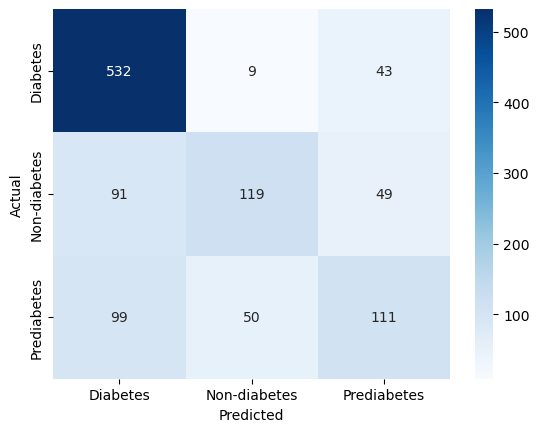

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, MaxPooling1D, Input
from scipy.stats import uniform
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("data_scaled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 'avg_dystolyc']].values
y = df['Status'].values

# === 3. Encode label & scale fitur ===
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. Reshape untuk CNN (samples, timesteps, features) ===
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# === 5. Split train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === 6. CNN5 Feature Extractor ===
cnn5_model = Sequential([
    Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2])),
    Conv1D(filters=64, kernel_size=1, activation='relu'),
    Conv1D(filters=64, kernel_size=1, activation='relu'),
    Conv1D(filters=128, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=1),
    Dense(64, activation='relu'),
    Flatten()
])

cnn5_model.compile(optimizer='adam', loss='mse')  # dummy loss
features_train = cnn5_model.predict(X_train)
features_test = cnn5_model.predict(X_test)

# === 7. SVM Hyperparameter Tuning ===
param_dist = {
    'C': uniform(0.1, 10),
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svm_model = SVC(probability=True, random_state=42)
random_search = RandomizedSearchCV(
    svm_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# === 8. Train SVM ===
random_search.fit(features_train, y_train)
best_svm = random_search.best_estimator_

print("\n=== Best Hyperparameters ===")
print(random_search.best_params_)

# === 9. Evaluasi ===
y_train_pred = best_svm.predict(features_train)
y_pred = best_svm.predict(features_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fitting 5 folds for each of 30 candidates, totalling 150 fits

=== Best Hyperparameters ===
{'C': 8.387375091519294, 'coef0': 0.3567533266935893, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Training Accuracy: 0.7034686012242122
Test Accuracy: 0.6609247506799637

Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.69      0.92      0.79       584
Non-diabetes       0.66      0.46      0.54       259
 Prediabetes       0.49      0.27      0.35       260

    accuracy                           0.66      1103
   macro avg       0.61      0.55      0.56      1103
weighted avg       0.64      0.66      0.63      1103



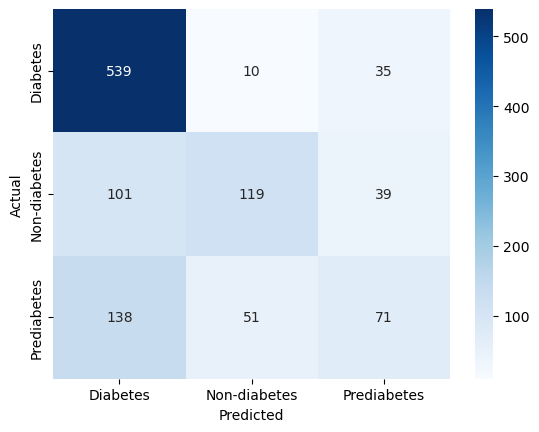

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Input
from scipy.stats import uniform, randint
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("data_scaled.csv")

# === 2. Fitur & Label ===
X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 'avg_dystolyc']].values
y = df['Status'].values

# === 3. Encode label & scale fitur ===
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. Reshape untuk CNN-LSTM (samples, timesteps, features) ===
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# === 5. Split train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === 6. CNN-LSTM Feature Extractor (fixed) ===
cnn_lstm_model = Sequential([
    Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2])),
    Conv1D(filters=32, kernel_size=1, activation='relu'),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Flatten()
])

cnn_lstm_model.compile(optimizer='adam', loss='mse')  # dummy loss, hanya untuk feature extraction

# Ekstraksi fitur
features_train = cnn_lstm_model.predict(X_train)
features_test = cnn_lstm_model.predict(X_test)

# === 7. Hyperparameter tuning semua SVM parameter ===
param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 1, 5)),
    'degree': randint(2, 5),
    'coef0': uniform(0, 1)
}

svm_clf = SVC(probability=True)
random_search = RandomizedSearchCV(
    svm_clf,
    param_distributions=param_dist,
    n_iter=30,   # jumlah iterasi random
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# === 8. Train SVM dengan tuning ===
random_search.fit(features_train, y_train)

print("\n=== Best Hyperparameters ===")
print(random_search.best_params_)

# === 9. Prediksi & evaluasi ===
best_svm = random_search.best_estimator_

# Training Accuracy
y_train_pred = best_svm.predict(features_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# Test Accuracy
y_pred = best_svm.predict(features_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fitting 5 folds for each of 30 candidates, totalling 150 fits

=== Best Hyperparameters ===
{'C': 8.387375091519294, 'coef0': 0.3567533266935893, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Training Accuracy: 0.8580820675583768
Test Accuracy: 0.815049864007253

Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.95      0.91      0.93       584
Non-diabetes       0.71      0.68      0.70       259
 Prediabetes       0.65      0.73      0.69       260

    accuracy                           0.82      1103
   macro avg       0.77      0.78      0.77      1103
weighted avg       0.82      0.82      0.82      1103



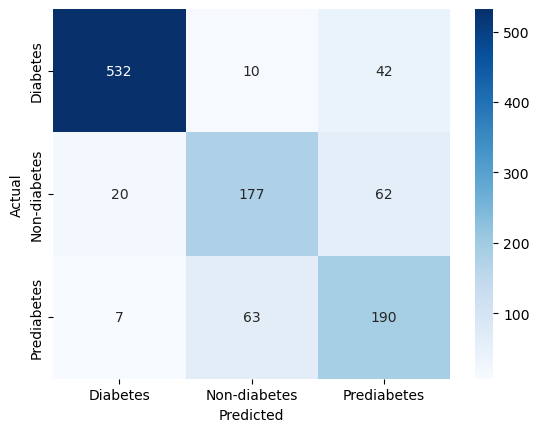

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Input
from scipy.stats import uniform, randint
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset dengan delimiter ';' ===
df = pd.read_csv("data_scaled.csv", delimiter=";")

# === 2. Cleaning kolom numerik ===
num_cols = ['BMI', 'age', 'fgb', 'hba1c', 'insulin', 
            'avg_systolyc', 'avg_dystolyc', 'insulin_log']

for col in num_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('.', '', regex=False)   # hapus pemisah ribuan
        .str.replace(',', '.', regex=False)  # ubah koma jadi titik desimal
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Isi NaN dengan median agar tidak error
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# === 3. Fitur & Label ===
X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 
        'avg_dystolyc', 'hba1c', 'fgb']].values
y = df['Status'].values

# === 4. Encode label & scale fitur ===
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 5. Reshape untuk CNN-LSTM (samples, timesteps, features) ===
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# === 6. Split train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === 7. CNN-LSTM Feature Extractor ===
cnn_lstm_model = Sequential([
    Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2])),
    Conv1D(filters=32, kernel_size=1, activation='relu'),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Flatten()
])

cnn_lstm_model.compile(optimizer='adam', loss='mse')  # dummy loss

# Ekstraksi fitur
features_train = cnn_lstm_model.predict(X_train)
features_test = cnn_lstm_model.predict(X_test)

# === 8. Hyperparameter tuning untuk SVM ===
param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 1, 5)),
    'degree': randint(2, 5),
    'coef0': uniform(0, 1)
}

svm_clf = SVC(probability=True)
random_search = RandomizedSearchCV(
    svm_clf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# === 9. Train SVM dengan tuning ===
random_search.fit(features_train, y_train)

print("\n=== Best Hyperparameters ===")
print(random_search.best_params_)

# === 10. Evaluasi ===
best_svm = random_search.best_estimator_

# Training Accuracy
y_train_pred = best_svm.predict(features_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# Test Accuracy
y_pred = best_svm.predict(features_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
pip install shap



   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   --


=== Random Forest ===
Accuracy: 0.699909338168631
              precision    recall  f1-score   support

    Diabetes       0.80      0.87      0.84       584
Non-diabetes       0.62      0.57      0.59       259
 Prediabetes       0.50      0.45      0.47       260

    accuracy                           0.70      1103
   macro avg       0.64      0.63      0.63      1103
weighted avg       0.69      0.70      0.69      1103



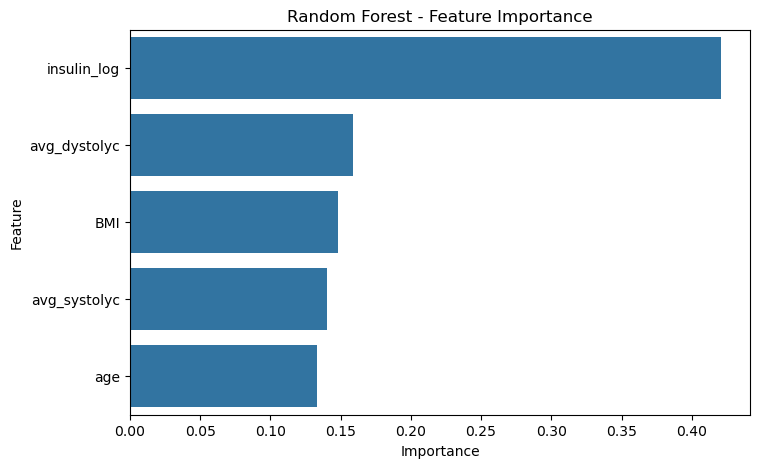


=== Logistic Regression ===
Accuracy: 0.6019945602901179
              precision    recall  f1-score   support

    Diabetes       0.61      0.93      0.73       584
Non-diabetes       0.60      0.43      0.50       259
 Prediabetes       0.44      0.04      0.08       260

    accuracy                           0.60      1103
   macro avg       0.55      0.47      0.44      1103
weighted avg       0.57      0.60      0.52      1103


Logistic Regression - Coefficients:
        Feature  Coefficient
2   insulin_log     0.407681
3  avg_systolyc     0.222934
1           age     0.137841
0           BMI    -0.006185
4  avg_dystolyc    -0.245490

=== SVM ===
Accuracy: 0.7017225747960109
              precision    recall  f1-score   support

    Diabetes       0.75      0.92      0.83       584
Non-diabetes       0.67      0.49      0.57       259
 Prediabetes       0.55      0.43      0.48       260

    accuracy                           0.70      1103
   macro avg       0.66      0.61   

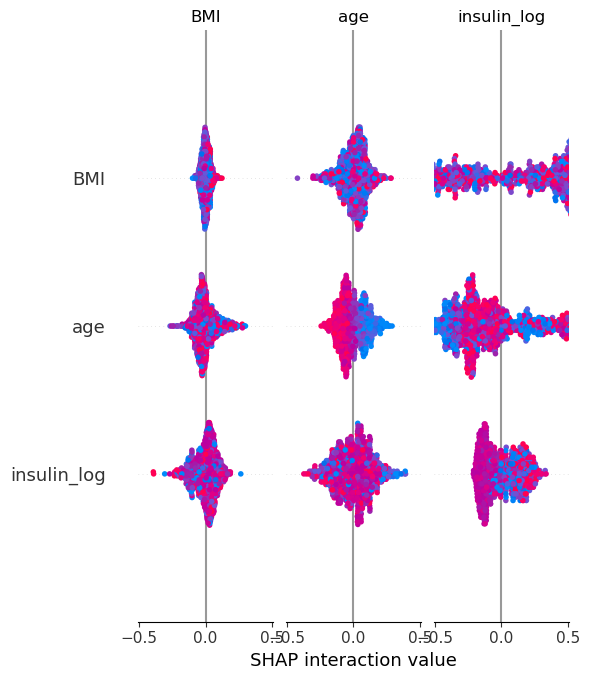

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import shap

# === 1. Load dataset hasil scaling ===
df = pd.read_csv("data_scaled.csv")

# === 2. Pilih fitur & target ===
X = df[['BMI', 'age', 'insulin_log', 'avg_systolyc', 
        'avg_dystolyc']].values
y = df['Status'].values

# === 3. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Random Forest ===
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Feature Importance
feat_importance = pd.DataFrame({
    "Feature": ['BMI', 'age', 'insulin_log', 'avg_systolyc',
                'avg_dystolyc'],
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_importance)
plt.title("Random Forest - Feature Importance")
plt.show()

# === 5. Logistic Regression ===
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

# Coefficients
coef = pd.DataFrame({
    "Feature": ['BMI', 'age', 'insulin_log', 'avg_systolyc',
                'avg_dystolyc'],
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nLogistic Regression - Coefficients:")
print(coef)

# === 6. SVM ===
svm = SVC(kernel="rbf", probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print("\n=== SVM ===")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

# === 7. SHAP untuk interpretasi (contoh pakai Random Forest) ===
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test)

print("\n=== SHAP Summary Plot - Random Forest ===")
shap.summary_plot(shap_values_rf, X_test, feature_names=['BMI','age','insulin_log','avg_systolyc','avg_dystolyc','hba1c','fgb'])


Fitting 5 folds for each of 18 candidates, totalling 90 fits

=== Best Params SVM ===
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

=== Stacking Classifier (RF + LR + Tuned SVM) ===
Accuracy: 0.7062556663644606
              precision    recall  f1-score   support

    Diabetes       0.81      0.86      0.83       584
Non-diabetes       0.64      0.59      0.61       259
 Prediabetes       0.51      0.48      0.49       260

    accuracy                           0.71      1103
   macro avg       0.65      0.64      0.65      1103
weighted avg       0.70      0.71      0.70      1103


=== SHAP Summary Plot - Random Forest (Base Model) ===


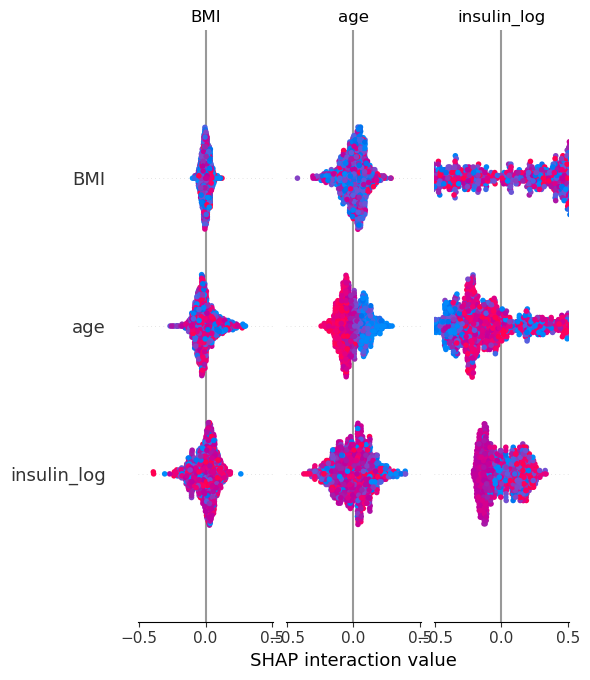

ValueError: shapes (3,14) and (5,) not aligned: 14 (dim 1) != 5 (dim 0)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import shap

# === 1. Load dataset ===
df = pd.read_csv("data_scaled.csv")

# === 2. Pilih fitur & target ===
feature_names = ['BMI', 'age', 'insulin_log', 'avg_systolyc', 
                 'avg_dystolyc']
X = df[feature_names].values
y = df['Status'].values

# === 3. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Random Forest ===
rf = RandomForestClassifier(random_state=42)

# === 5. Logistic Regression ===
logreg = LogisticRegression(max_iter=1000, random_state=42)

# === 6. Hypertuning SVM ===
svm = SVC(probability=True, random_state=42)

param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"],
    "kernel": ["rbf", "poly", "sigmoid"]
}

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("\n=== Best Params SVM ===")
print(grid_search.best_params_)

best_svm = grid_search.best_estimator_

# === 7. Stacking Classifier ===
stack_model = StackingClassifier(
    estimators=[
        ("rf", rf),
        ("logreg", logreg),
        ("svm", best_svm)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    passthrough=True,
    n_jobs=-1
)

# === 8. Train Stacking ===
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)

# === 9. Evaluasi ===
print("\n=== Stacking Classifier (RF + LR + Tuned SVM) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# === 10. SHAP Analysis (contoh: Random Forest dalam stacking) ===
explainer = shap.TreeExplainer(rf.fit(X_train, y_train))
shap_values = explainer.shap_values(X_test)

print("\n=== SHAP Summary Plot - Random Forest (Base Model) ===")
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

# === 11. SHAP untuk Logistic Regression (final estimator) ===
final_model = stack_model.final_estimator_
explainer_lr = shap.LinearExplainer(final_model, X_train, feature_names=feature_names)
shap_values_lr = explainer_lr.shap_values(X_test)

print("\n=== SHAP Summary Plot - Logistic Regression (Final Estimator) ===")
shap.summary_plot(shap_values_lr, X_test, feature_names=feature_names)


PENAMBAHAN GENDER

C:\Users\ASUS\AppData\Local\Temp\ipykernel_49776\3033023185.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


Training Accuracy: 1.0
Test Accuracy: 0.6881233000906618

Classification Report:
              precision    recall  f1-score   support

    Diabetes       0.77      0.88      0.82       584
Non-diabetes       0.63      0.55      0.59       259
 Prediabetes       0.49      0.40      0.44       260

    accuracy                           0.69      1103
   macro avg       0.63      0.61      0.62      1103
weighted avg       0.67      0.69      0.68      1103



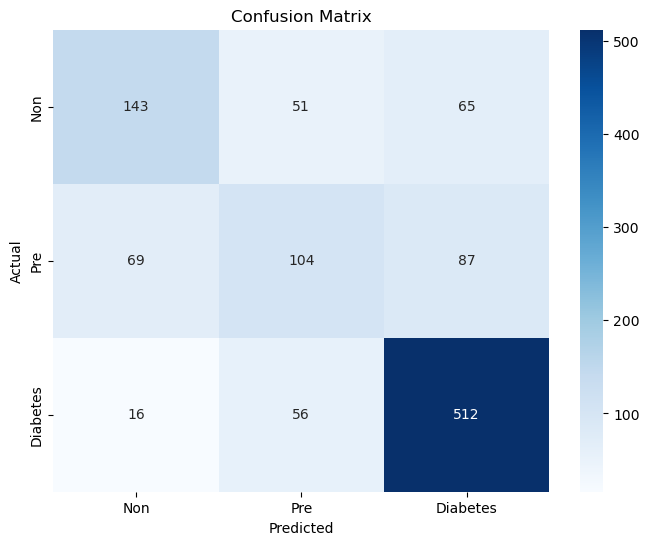

Cross-Validation Accuracy: 0.6880547915655504


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Baca dataset ===
df = pd.read_csv("data_scaled_gender.csv", delimiter=';')

# === 2. Definisikan fitur dan lakukan PEMBERSIHAN DATA terlebih dahulu ===
feature_columns = ['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc','genderLK','genderPR']

for col in feature_columns:
    # Ubah paksa menjadi numerik. Nilai yang gagal akan menjadi NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Periksa dan isi nilai NaN dengan median dari kolom tersebut (LANGKAH PENTING)
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# === 3. Setelah data bersih, baru pisahkan fitur dan label ===
X = df[feature_columns]
y = df['Status']

# === 4. Split data 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 5. Training Random Forest ===
# Baris ini sekarang akan berjalan tanpa error karena X sudah bersih
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# === 6. Evaluasi ===
y_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6)) # Menambahkan ukuran plot agar lebih jelas
cm = confusion_matrix(y_test, y_pred, labels=["Non-diabetes", "Prediabetes", "Diabetes"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non", "Pre", "Diabetes"],
            yticklabels=["Non", "Pre", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show() # Perbaikan: menggunakan tanda kurung ()

# === 7. Cross-validation (opsional) ===
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean()) # Perbaikan: menggunakan tanda kurung ()

Memulai pembersihan data...
Menangani nilai non-numerik/NaN di kolom 'BMI'.
Menangani nilai non-numerik/NaN di kolom 'age'.
Menangani nilai non-numerik/NaN di kolom 'avg_systolyc'.
Menangani nilai non-numerik/NaN di kolom 'avg_dystolyc'.
Menangani nilai non-numerik/NaN di kolom 'hdl'.
Pembersihan data selesai.

Memulai training Stacking Classifier...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 4411, number of used features: 8
[LightGBM] [Info] Start training from score -0.635233
[LightGBM] [Info] Start training from score -1.449700
[LightGBM] [Info] Start training from score -1.445843


C:\Users\ASUS\AppData\Local\Temp\ipykernel_49776\3197570708.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 3528, number of used features: 8
[LightGBM] [Info] Start training from score -0.635328
[LightGBM] [Info] Start training from score -1.449473
[LightGBM] [Info] Start training from score -1.445857
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 3529, number of used features: 8
[LightGBM] [Info] Start training from score -0.635611
[LightGBM] [Info] Start training from score -1.449757
[LightGBM] [Info] Start training from score -1.444937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.


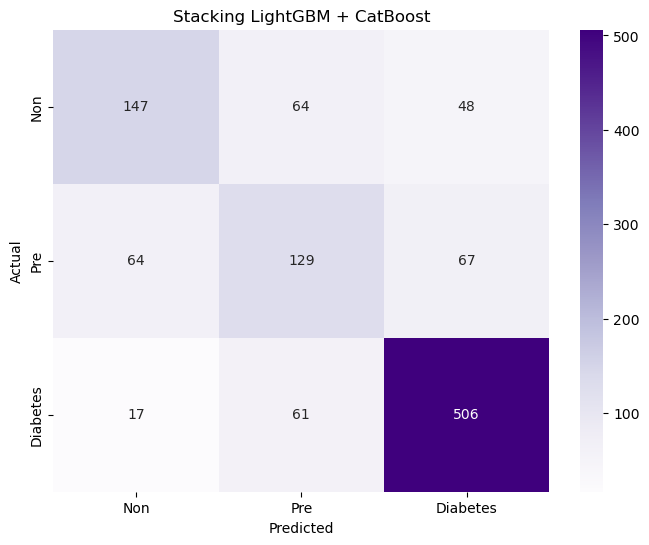


Memulai Cross-Validation...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 3676, number of used features: 8
[LightGBM] [Info] Start training from score -0.635022
[LightGBM] [Info] Start training from score -1.450325
[LightGBM] [Info] Start training from score -1.445696
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 2940, number of used features: 8
[LightGBM] [Info] Start training from score -0.634365
[LightGBM] [Info] Start training from score -1.450924
[LightGBM] [Info] Start training from score -1.446579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of t

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Model Imports ===
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# === 1. Baca dataset ===
df = pd.read_csv("data_scaled_gender.csv", delimiter=";")

# === 2. Definisikan fitur & LAKUKAN PEMBERSIHAN DATA ===
feature_columns = ['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc','hdl','genderLK','genderPR']

print("Memulai pembersihan data...")
for col in feature_columns:
    # Ubah paksa menjadi numerik. Nilai yang gagal akan menjadi NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Periksa dan isi nilai NaN dengan median dari kolom tersebut
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Menangani nilai non-numerik/NaN di kolom '{col}'.")
print("Pembersihan data selesai.\n")
# ----------------------------------------------------

# === 3. Setelah data bersih, baru pisahkan fitur dan label ===
X = df[feature_columns]
y = df['Status']

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Definisikan model ===
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=-1, random_state=42)
cat = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
meta_model = LogisticRegression(max_iter=1000)

stack_model = StackingClassifier(
    estimators=[('lgbm', lgbm), ('cat', cat)],
    final_estimator=meta_model,
    cv=5,
    stack_method='predict_proba'
)

# === 5. Training ===
print("Memulai training Stacking Classifier...")
stack_model.fit(X_train, y_train)
print("Training selesai.\n")

# === 6. Evaluasi ===
y_pred_stack = stack_model.predict(X_test)

print("🔹 Stacking (LightGBM + CatBoost)")
print("Train Accuracy:", accuracy_score(y_train, stack_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_stack = confusion_matrix(y_test, y_pred_stack, labels=["Non-diabetes", "Prediabetes", "Diabetes"])
sns.heatmap(cm_stack, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Non", "Pre", "Diabetes"],
            yticklabels=["Non", "Pre", "Diabetes"])
plt.title("Stacking LightGBM + CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === 7. Cross Validation ===
print("\nMemulai Cross-Validation...")
cv_scores = cross_val_score(stack_model, X, y, cv=3, scoring='accuracy') # cv=3 agar lebih cepat
print("Cross-Validation Selesai.\n")
print("Cross-Validation Accuracy (mean):", cv_scores.mean())
print("Cross-Validation Accuracy (all folds):", cv_scores)

Memulai pembersihan data...
Menangani nilai non-numerik/NaN di kolom 'BMI'.
Menangani nilai non-numerik/NaN di kolom 'age'.
Menangani nilai non-numerik/NaN di kolom 'avg_systolyc'.
Menangani nilai non-numerik/NaN di kolom 'avg_dystolyc'.
Menangani nilai non-numerik/NaN di kolom 'hdl'.
Pembersihan data selesai.

Memulai training Stacking Classifier (LGBM + CatBoost + SVM)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 4411, number of used features: 8
[LightGBM] [Info] Start training from score -0.635233
[LightGBM] [Info] Start training from score -1.449700
[LightGBM] [Info] Start training from score -1.445843


C:\Users\ASUS\AppData\Local\Temp\ipykernel_49776\4200812530.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 3528, number of used features: 8
[LightGBM] [Info] Start training from score -0.635328
[LightGBM] [Info] Start training from score -1.449473
[LightGBM] [Info] Start training from score -1.445857
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 3529, number of used features: 8
[LightGBM] [Info] Start training from score -0.635611
[LightGBM] [Info] Start training from score -1.449757
[LightGBM] [Info] Start training from score -1.444937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.


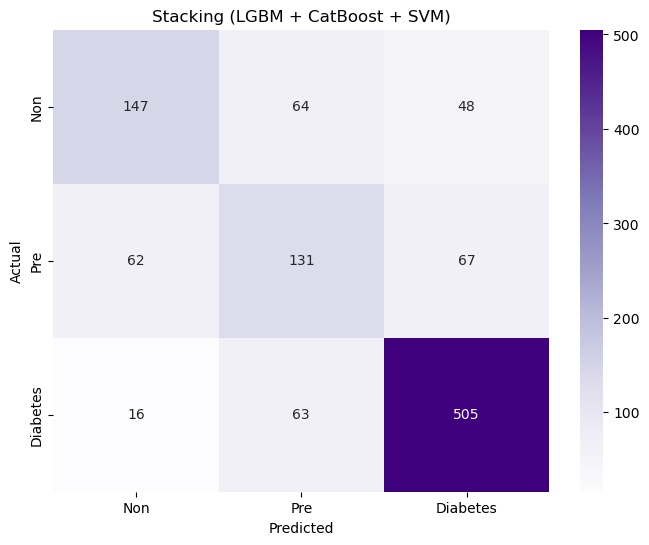


Memulai Cross-Validation untuk Stacking Model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 3676, number of used features: 8
[LightGBM] [Info] Start training from score -0.635022
[LightGBM] [Info] Start training from score -1.450325
[LightGBM] [Info] Start training from score -1.445696
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 2940, number of used features: 8
[LightGBM] [Info] Start training from score -0.634365
[LightGBM] [Info] Start training from score -1.450924
[LightGBM] [Info] Start training from score -1.446579
[LightGBM] [Info] Auto-choosing col-wise multi-threadi

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Model Imports ===
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC  # <-- TAMBAHAN BARU
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# === 1. Baca dataset ===
df = pd.read_csv("data_scaled_gender.csv", delimiter=";")

# === 2. Definisikan fitur & LAKUKAN PEMBERSIHAN DATA ===
feature_columns = ['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc','hdl','genderLK','genderPR']

print("Memulai pembersihan data...")
for col in feature_columns:
    # Ubah paksa menjadi numerik. Nilai yang gagal akan menjadi NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Periksa dan isi nilai NaN dengan median dari kolom tersebut
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Menangani nilai non-numerik/NaN di kolom '{col}'.")
print("Pembersihan data selesai.\n")
# ----------------------------------------------------

# === 3. Setelah data bersih, baru pisahkan fitur dan label ===
X = df[feature_columns]
y = df['Status']

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Definisikan model ===
# Base models
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=-1, random_state=42)
cat = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

# --- TAMBAHAN BARU: Definisikan model SVM ---
# Menggunakan parameter yang sudah di-tuning secara umum.
# probability=True WAJIB agar bisa digunakan di StackingClassifier dengan 'predict_proba'
svm = SVC(C=1.0, kernel='rbf', probability=True, random_state=42)
# -------------------------------------------

# Meta model (blender)
meta_model = LogisticRegression(max_iter=1000)

# Stacking Classifier dengan 3 model dasar
stack_model = StackingClassifier(
    estimators=[
        ('lgbm', lgbm), 
        ('cat', cat),
        ('svm', svm)  # <-- TAMBAHAN BARU
    ],
    final_estimator=meta_model,
    cv=5, # Cross-validation untuk base models
    stack_method='predict_proba'
)

# === 5. Training ===
print("Memulai training Stacking Classifier (LGBM + CatBoost + SVM)...")
stack_model.fit(X_train, y_train)
print("Training selesai.\n")

# === 6. Evaluasi ===
y_pred_stack = stack_model.predict(X_test)

print("🔹 Stacking (LightGBM + CatBoost + SVM)")
print("Train Accuracy:", accuracy_score(y_train, stack_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_stack = confusion_matrix(y_test, y_pred_stack, labels=["Non-diabetes", "Prediabetes", "Diabetes"])
sns.heatmap(cm_stack, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Non", "Pre", "Diabetes"],
            yticklabels=["Non", "Pre", "Diabetes"])
plt.title("Stacking (LGBM + CatBoost + SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === 7. Cross Validation untuk keseluruhan Stacking Model ===
print("\nMemulai Cross-Validation untuk Stacking Model...")
# Menggunakan cv=3 agar proses tidak terlalu lama, bisa diubah ke 5 jika diinginkan
cv_scores = cross_val_score(stack_model, X, y, cv=3, scoring='accuracy') 
print("Cross-Validation Selesai.\n")
print("Cross-Validation Accuracy (mean):", cv_scores.mean())
print("Cross-Validation Accuracy (all folds):", cv_scores)

In [4]:
#HYPERTUNING RANDOM FOREST

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

# === 1. Load data ===
df = pd.read_csv("data_scaled_gender.csv", delimiter=";")

# === 2. Definisikan fitur & LAKUKAN PEMBERSIHAN DATA ===
feature_columns = [
    'BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc'
]

print("Memulai pembersihan data untuk Random Forest...")
for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
print("Pembersihan data selesai.\n")
# ----------------------------------------------------

# === 3. Pilih fitur dan label ===
X = df[feature_columns]
y = df['Status']

# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === 4. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# === 5. Definisikan model dan space hyperparameter ---
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 25),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 6),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# === 6. RandomizedSearchCV ---
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Jumlah iterasi, bisa dikurangi jika ingin lebih cepat
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# === 7. Latih model dengan tuning ---
print("Memulai Hyperparameter Tuning untuk Random Forest...")
random_search.fit(X_train, y_train)
print("Tuning selesai.\n")

# === 8. Evaluasi model terbaik ===
print("=== Best Hyperparameters ===")
print(random_search.best_params_)

best_rf = random_search.best_estimator_

# 🔹 Prediksi pada data training & testing
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# 🔹 Hitung akurasi training dan testing
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\n=== Akurasi ===")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")

# 🔹 Classification report dan detail lainnya
print("\n=== Classification Report (Test Data) ===")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))


Memulai pembersihan data untuk Random Forest...
Pembersihan data selesai.

Memulai Hyperparameter Tuning untuk Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\ASUS\AppData\Local\Temp\ipykernel_49568\1167694642.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Tuning selesai.

=== Best Hyperparameters ===
{'bootstrap': True, 'max_depth': 19, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 112}

=== Akurasi ===
Training Accuracy: 0.8559
Testing Accuracy : 0.6998

=== Classification Report (Test Data) ===
              precision    recall  f1-score   support

    Diabetes       0.80      0.87      0.84       730
Non-diabetes       0.62      0.55      0.58       324
 Prediabetes       0.51      0.46      0.48       325

    accuracy                           0.70      1379
   macro avg       0.64      0.63      0.63      1379
weighted avg       0.69      0.70      0.69      1379



In [3]:
#RANDOMFOREST 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# === 1. Load data ===
df = pd.read_csv("Dataset/data_scaled_gender.csv", delimiter=";")

# === 2. Definisikan fitur & lakukan pembersihan data ===
feature_columns = [
    'BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc'
]

print("Memulai pembersihan data untuk Random Forest (baseline)...")
for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
print("Pembersihan data selesai.\n")

# === 3. Pilih fitur dan label ===
X = df[feature_columns]
y = df['Status']

# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === 4. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# === 5. Model Random Forest (tanpa tuning) ===
rf_baseline = RandomForestClassifier(random_state=42)

# === 6. Latih model ===
print("Melatih Random Forest baseline...")
rf_baseline.fit(X_train, y_train)

# === 7. Prediksi & evaluasi ===
y_pred = rf_baseline.predict(X_test)
y_train_pred = rf_baseline.predict(X_train)
y_pred = rf_baseline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print("\n===train  Test Accuracy (Baseline) ===")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

print("\n=== Classification Report (Baseline) ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Memulai pembersihan data untuk Random Forest (baseline)...
Pembersihan data selesai.

Melatih Random Forest baseline...


C:\Users\ASUS\AppData\Local\Temp\ipykernel_39104\1334317193.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)



===train  Test Accuracy (Baseline) ===
Training Accuracy: 1.0000
Testing Accuracy: 0.6867

=== Classification Report (Baseline) ===
              precision    recall  f1-score   support

    Diabetes       0.79      0.88      0.83       730
Non-diabetes       0.60      0.53      0.56       324
 Prediabetes       0.48      0.42      0.45       325

    accuracy                           0.69      1379
   macro avg       0.62      0.61      0.61      1379
weighted avg       0.67      0.69      0.68      1379



In [8]:
# === XGBOOST ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# === 1. Load data ===
df = pd.read_csv("data_scaled_gender.csv", delimiter=";")

# === 2. Definisikan fitur & lakukan pembersihan data ===
feature_columns = [
    'BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc'
]

print("Memulai pembersihan data untuk XGBoost baseline...")
for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
print("Pembersihan data selesai.\n")

# === 3. Pilih fitur dan label ===
X = df[feature_columns]
y = df['Status']

# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === 4. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# === 5. Model XGBoost (tanpa tuning) ===
xgb_baseline = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# === 6. Latih model ===
print("Melatih XGBoost baseline...")
xgb_baseline.fit(X_train, y_train)

# === 7. Prediksi & evaluasi ===
y_train_pred = xgb_baseline.predict(X_train)
y_test_pred = xgb_baseline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\n=== XGBoost Baseline Accuracy ===")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")

print("\n=== Classification Report (Baseline) ===")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))


Memulai pembersihan data untuk XGBoost baseline...
Pembersihan data selesai.

Melatih XGBoost baseline...


C:\Users\ASUS\AppData\Local\Temp\ipykernel_49568\3089747271.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
c:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:47:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost Baseline Accuracy ===
Training Accuracy: 0.9719
Testing Accuracy : 0.6875

=== Classification Report (Baseline) ===
              precision    recall  f1-score   support

    Diabetes       0.80      0.87      0.83       730
Non-diabetes       0.61      0.53      0.57       324
 Prediabetes       0.47      0.43      0.45       325

    accuracy                           0.69      1379
   macro avg       0.62      0.61      0.62      1379
weighted avg       0.68      0.69      0.68      1379



In [9]:
# === XGBOOST TUNING (RandomizedSearchCV) ===
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# === 1. Load data ===
df = pd.read_csv("data_scaled_gender.csv", delimiter=";")

# === 2. Definisikan fitur & lakukan pembersihan data ===
feature_columns = [
    'BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc'
]

print("Memulai pembersihan data untuk XGBoost (tuning)...")
for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
print("Pembersihan data selesai.\n")

# === 3. Pilih fitur dan label ===
X = df[feature_columns]
y = df['Status']

# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === 4. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# === 5. Definisikan model & ruang hyperparameter ===
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# === 6. RandomizedSearchCV ===
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("\nMemulai Hyperparameter Tuning untuk XGBoost...")
random_search.fit(X_train, y_train)
print("Tuning selesai.\n")

# === 7. Evaluasi model terbaik ===
print("=== Best Hyperparameters (XGBoost) ===")
print(random_search.best_params_)

best_xgb = random_search.best_estimator_
y_train_pred_best = best_xgb.predict(X_train)
y_test_pred_best = best_xgb.predict(X_test)

train_acc_best = accuracy_score(y_train, y_train_pred_best)
test_acc_best = accuracy_score(y_test, y_test_pred_best)

print("\n=== XGBoost Tuned Accuracy ===")
print(f"Training Accuracy: {train_acc_best:.4f}")
print(f"Testing Accuracy : {test_acc_best:.4f}")

print("\n=== Classification Report (Tuned) ===")
print(classification_report(y_test, y_test_pred_best, target_names=le.classes_))


Memulai pembersihan data untuk XGBoost (tuning)...
Pembersihan data selesai.


Memulai Hyperparameter Tuning untuk XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\ASUS\AppData\Local\Temp\ipykernel_49568\325621360.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
c:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:48:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuning selesai.

=== Best Hyperparameters (XGBoost) ===
{'colsample_bytree': 0.6838579015297168, 'gamma': 1.3260118384086272, 'learning_rate': 0.08319689301372507, 'max_depth': 8, 'n_estimators': 329, 'reg_alpha': 0.3930977246667604, 'reg_lambda': 0.8920465551771133, 'subsample': 0.8155693129986314}

=== XGBoost Tuned Accuracy ===
Training Accuracy: 0.7826
Testing Accuracy : 0.7063

=== Classification Report (Tuned) ===
              precision    recall  f1-score   support

    Diabetes       0.80      0.88      0.84       730
Non-diabetes       0.63      0.55      0.59       324
 Prediabetes       0.53      0.47      0.50       325

    accuracy                           0.71      1379
   macro avg       0.65      0.63      0.64      1379
weighted avg       0.69      0.71      0.70      1379



In [2]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6364\654582332.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # isi NaN pakai median


Mulai Hyperparameter Tuning...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Tuning selesai!

=== Best Parameters ===
{'lstm_units': 32, 'lr': 0.001, 'epochs': 40, 'dense_units': 32, 'conv_filters': 32, 'batch_size': 32}

=== Test Accuracy ===
0.8087035358114234

=== Classification Report ===
              precision    recall  f1-score   support

    Diabetes       0.85      0.89      0.87       584
Non-diabetes       0.73      0.80      0.76       259
 Prediabetes       0.80      0.63      0.70       260

    accuracy                           0.81      1103
   macro avg       0.79      0.77      0.78      1103
weighted avg       0.81      0.81      0.81      1103



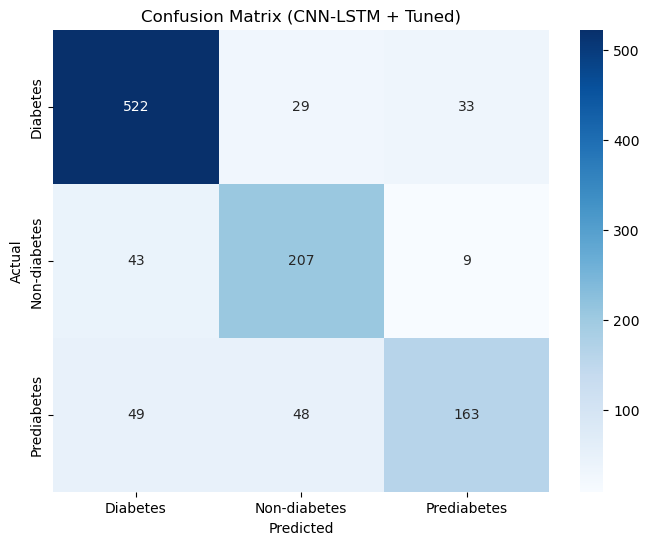

In [ ]:
#CNN + LSTM HYPERTUNING

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasClassifier

# ======================
# 1. Load dataset
# ======================
df = pd.read_csv("data_scaled_gender.csv", delimiter=";")

# fitur yang dipakai
feature_columns = ['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc']

# pastikan semua kolom numerik valid
for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # ubah ke float, yg gagal jadi NaN
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)  # isi NaN pakai median

X = df[feature_columns].values
y = df['Status'].values
# ======================
# 2. Build model function
# ======================
def build_lstm_model(conv_filters=32, lstm_units=32, dense_units=16, lr=0.001):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Conv1D(filters=conv_filters, kernel_size=1, activation='relu'))
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# ======================
# 3. KerasClassifier wrapper
# ======================
keras_clf = KerasClassifier(
    model=build_lstm_model,
    conv_filters=32,  # default
    lstm_units=32,
    dense_units=16,
    lr=0.001,
    epochs=30,
    batch_size=32,
    verbose=0
)

# ======================
# 4. Hyperparameter space
# ======================
param_dist = {
    "conv_filters": [32, 64],
    "lstm_units": [32, 64],
    "dense_units": [16, 32],
    "lr": [0.001, 0.0005],
    "batch_size": [16, 32],
    "epochs": [20, 40]
}

# ======================
# 5. RandomizedSearchCV
# ======================
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

random_search = RandomizedSearchCV(
    estimator=keras_clf,
    param_distributions=param_dist,
    n_iter=5,  # bisa ditambah kalau mau lebih thorough
    cv=3,
    scoring="accuracy",
    n_jobs=1,  # jangan pakai -1 untuk keras
    verbose=1,
    random_state=42
)

fit_params = {
    "callbacks": [early_stopping],
    "validation_split": 0.15
}

print("Mulai Hyperparameter Tuning...")
random_search.fit(X_train, y_train, **fit_params)
print("Tuning selesai!\n")

# ======================
# 6. Evaluation
# ======================
print("=== Best Parameters ===")
print(random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n=== Test Accuracy ===")
print(accuracy_score(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (CNN-LSTM + Tuned)")
plt.show()


In [2]:
!pip install scikit-optimize


🧹 Pembersihan data untuk CNN + LSTM...
✅ Pembersihan selesai.

🔍 Memulai Bayesian Optimization untuk CNN + LSTM...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\ASUS\AppData\Local\Temp\ipykernel_45240\1036893459.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=120, model__dense_units=51, model__dropout_rate=0.3680591793075739, model__learning_rate=0.0006733444192152367, model__lstm_units=55; total time=  22.4s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=120, model__dense_units=51, model__dropout_rate=0.3680591793075739, model__learning_rate=0.0006733444192152367, model__lstm_units=55; total time=  24.1s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=120, model__dense_units=51, model__dropout_rate=0.3680591793075739, model__learning_rate=0.0006733444192152367, model__lstm_units=55; total time=  24.6s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=120, model__dense_units=51, model__dropout_rate=0.3680591793075739, model__learning_rate=0.0006733444192152367, model__lstm_units=55; total time= 1.4min


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=120, model__dense_units=51, model__dropout_rate=0.3680591793075739, model__learning_rate=0.0006733444192152367, model__lstm_units=55; total time= 1.6min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=50, model__dense_units=123, model__dropout_rate=0.44565116618598033, model__learning_rate=0.00013323731791098763, model__lstm_units=31; total time= 1.0min


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=50, model__dense_units=123, model__dropout_rate=0.44565116618598033, model__learning_rate=0.00013323731791098763, model__lstm_units=31; total time= 1.0min


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=50, model__dense_units=123, model__dropout_rate=0.44565116618598033, model__learning_rate=0.00013323731791098763, model__lstm_units=31; total time= 1.1min


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=50, model__dense_units=123, model__dropout_rate=0.44565116618598033, model__learning_rate=0.00013323731791098763, model__lstm_units=31; total time=  54.9s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=50, model__dense_units=123, model__dropout_rate=0.44565116618598033, model__learning_rate=0.00013323731791098763, model__lstm_units=31; total time= 1.2min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=28, model__dense_units=65, model__dropout_rate=0.17518207454693946, model__learning_rate=0.0008078499224286772, model__lstm_units=33; total time=  36.6s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=28, model__dense_units=65, model__dropout_rate=0.17518207454693946, model__learning_rate=0.0008078499224286772, model__lstm_units=33; total time=  38.0s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=28, model__dense_units=65, model__dropout_rate=0.17518207454693946, model__learning_rate=0.0008078499224286772, model__lstm_units=33; total time=  47.8s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=28, model__dense_units=65, model__dropout_rate=0.17518207454693946, model__learning_rate=0.0008078499224286772, model__lstm_units=33; total time=  37.0s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=28, model__dense_units=65, model__dropout_rate=0.17518207454693946, model__learning_rate=0.0008078499224286772, model__lstm_units=33; total time=  25.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__conv_filters=83, model__dense_units=106, model__dropout_rate=0.3092209312217534, model__learning_rate=0.00015520656182929816, model__lstm_units=101; total time=   7.4s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__conv_filters=83, model__dense_units=106, model__dropout_rate=0.3092209312217534, model__learning_rate=0.00015520656182929816, model__lstm_units=101; total time=  25.1s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__conv_filters=83, model__dense_units=106, model__dropout_rate=0.3092209312217534, model__learning_rate=0.00015520656182929816, model__lstm_units=101; total time=  33.6s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__conv_filters=83, model__dense_units=106, model__dropout_rate=0.3092209312217534, model__learning_rate=0.00015520656182929816, model__lstm_units=101; total time=  38.9s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__conv_filters=83, model__dense_units=106, model__dropout_rate=0.3092209312217534, model__learning_rate=0.00015520656182929816, model__lstm_units=101; total time=  31.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=50, model__conv_filters=75, model__dense_units=96, model__dropout_rate=0.4615408290026747, model__learning_rate=0.0027168289873702846, model__lstm_units=64; total time=  11.0s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=50, model__conv_filters=75, model__dense_units=96, model__dropout_rate=0.4615408290026747, model__learning_rate=0.0027168289873702846, model__lstm_units=64; total time=  10.1s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=50, model__conv_filters=75, model__dense_units=96, model__dropout_rate=0.4615408290026747, model__learning_rate=0.0027168289873702846, model__lstm_units=64; total time=  10.1s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=50, model__conv_filters=75, model__dense_units=96, model__dropout_rate=0.4615408290026747, model__learning_rate=0.0027168289873702846, model__lstm_units=64; total time=   9.8s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=50, model__conv_filters=75, model__dense_units=96, model__dropout_rate=0.4615408290026747, model__learning_rate=0.0027168289873702846, model__lstm_units=64; total time=  10.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=34, model__dense_units=37, model__dropout_rate=0.420201292582698, model__learning_rate=0.0005561085291185476, model__lstm_units=67; total time=  14.7s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=34, model__dense_units=37, model__dropout_rate=0.420201292582698, model__learning_rate=0.0005561085291185476, model__lstm_units=67; total time=  15.0s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=34, model__dense_units=37, model__dropout_rate=0.420201292582698, model__learning_rate=0.0005561085291185476, model__lstm_units=67; total time=  16.1s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=34, model__dense_units=37, model__dropout_rate=0.420201292582698, model__learning_rate=0.0005561085291185476, model__lstm_units=67; total time=  15.0s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=34, model__dense_units=37, model__dropout_rate=0.420201292582698, model__learning_rate=0.0005561085291185476, model__lstm_units=67; total time=  15.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=56, model__dense_units=114, model__dropout_rate=0.33704787012222714, model__learning_rate=0.0015461088645165448, model__lstm_units=89; total time=  23.8s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=56, model__dense_units=114, model__dropout_rate=0.33704787012222714, model__learning_rate=0.0015461088645165448, model__lstm_units=89; total time=  24.6s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=56, model__dense_units=114, model__dropout_rate=0.33704787012222714, model__learning_rate=0.0015461088645165448, model__lstm_units=89; total time=  23.6s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=56, model__dense_units=114, model__dropout_rate=0.33704787012222714, model__learning_rate=0.0015461088645165448, model__lstm_units=89; total time=  24.1s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=56, model__dense_units=114, model__dropout_rate=0.33704787012222714, model__learning_rate=0.0015461088645165448, model__lstm_units=89; total time=  24.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=72, model__dense_units=110, model__dropout_rate=0.22962399291374946, model__learning_rate=0.0001265520274819315, model__lstm_units=80; total time=  23.7s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=72, model__dense_units=110, model__dropout_rate=0.22962399291374946, model__learning_rate=0.0001265520274819315, model__lstm_units=80; total time=  55.4s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=72, model__dense_units=110, model__dropout_rate=0.22962399291374946, model__learning_rate=0.0001265520274819315, model__lstm_units=80; total time= 1.7min


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=72, model__dense_units=110, model__dropout_rate=0.22962399291374946, model__learning_rate=0.0001265520274819315, model__lstm_units=80; total time= 1.4min


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=80, model__conv_filters=72, model__dense_units=110, model__dropout_rate=0.22962399291374946, model__learning_rate=0.0001265520274819315, model__lstm_units=80; total time= 1.6min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=114, model__dense_units=63, model__dropout_rate=0.25242590591899716, model__learning_rate=0.0002647454924455449, model__lstm_units=16; total time= 1.1min


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=114, model__dense_units=63, model__dropout_rate=0.25242590591899716, model__learning_rate=0.0002647454924455449, model__lstm_units=16; total time=  52.0s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=114, model__dense_units=63, model__dropout_rate=0.25242590591899716, model__learning_rate=0.0002647454924455449, model__lstm_units=16; total time= 1.0min


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=114, model__dense_units=63, model__dropout_rate=0.25242590591899716, model__learning_rate=0.0002647454924455449, model__lstm_units=16; total time=  14.7s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=80, model__conv_filters=114, model__dense_units=63, model__dropout_rate=0.25242590591899716, model__learning_rate=0.0002647454924455449, model__lstm_units=16; total time=  13.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=80, model__conv_filters=99, model__dense_units=45, model__dropout_rate=0.33146573449135397, model__learning_rate=0.0003543477648512006, model__lstm_units=51; total time=  35.4s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=80, model__conv_filters=99, model__dense_units=45, model__dropout_rate=0.33146573449135397, model__learning_rate=0.0003543477648512006, model__lstm_units=51; total time=  35.2s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=80, model__conv_filters=99, model__dense_units=45, model__dropout_rate=0.33146573449135397, model__learning_rate=0.0003543477648512006, model__lstm_units=51; total time=  36.0s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=80, model__conv_filters=99, model__dense_units=45, model__dropout_rate=0.33146573449135397, model__learning_rate=0.0003543477648512006, model__lstm_units=51; total time=  36.2s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=80, model__conv_filters=99, model__dense_units=45, model__dropout_rate=0.33146573449135397, model__learning_rate=0.0003543477648512006, model__lstm_units=51; total time=  39.0s


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Selesai tuning!

=== Best Hyperparameters ===
OrderedDict({'batch_size': 32, 'epochs': 80, 'model__conv_filters': 28, 'model__dense_units': 65, 'model__dropout_rate': 0.17518207454693946, 'model__learning_rate': 0.0008078499224286772, 'model__lstm_units': 33})

=== Test Accuracy ===
0.6875

=== Classification Report ===
              precision    recall  f1-score   support

    Diabetes       0.79      0.84      0.81       730
Non-diabetes       0.60      0.59      0.60       324
 Prediabetes       0.51      0.44      0.47       325

    accuracy                           0.69      1379
   macro avg       0.63      0.62      0.63      1379
weighted avg       0.68      0.69      0.68      1379



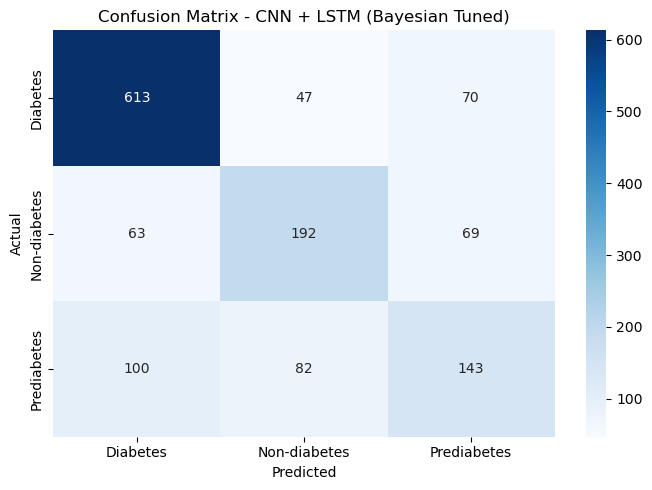

In [4]:
# ===========================================================
# CNN + LSTM + BAYESIAN OPTIMIZATION (PAKAI DATASET ASLI)
# ===========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasClassifier
from skopt import BayesSearchCV

# ===========================================================
# 1. Load Dataset
# ===========================================================
df = pd.read_csv("Dataset/data_scaled_gender.csv", delimiter=";")

# Pilih fitur yang digunakan
feature_columns = ['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc']

# Pastikan semua kolom numerik valid
print("🧹 Pembersihan data untuk CNN + LSTM...")
for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
print("✅ Pembersihan selesai.\n")

# ===========================================================
# 2. Feature & Label
# ===========================================================
X = df[feature_columns].values
y = df['Status'].values

# Encode label
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# ===========================================================
# 3. Normalisasi dan Reshape untuk CNN + LSTM
# ===========================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# CNN+LSTM butuh input 3D: (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# ===========================================================
# 4. Build Model Function
# ===========================================================
def build_model(conv_filters=64, lstm_units=64, dense_units=64,
                dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        Conv1D(conv_filters, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
        LSTM(lstm_units, return_sequences=False),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===========================================================
# 5. Bungkus model dengan KerasClassifier
# ===========================================================
keras_clf = KerasClassifier(model=build_model, verbose=0)

# ===========================================================
# 6. Ruang Hyperparameter untuk Bayesian Optimization
# ===========================================================
search_space = {
    "model__conv_filters": (16, 128),
    "model__lstm_units": (16, 128),
    "model__dense_units": (16, 128),
    "model__dropout_rate": (0.1, 0.5),
    "model__learning_rate": (1e-4, 1e-2, "log-uniform"),
    "batch_size": [16, 32, 64],
    "epochs": [30, 50, 80],
}

# ===========================================================
# 7. Setup Bayesian Optimization
# ===========================================================
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

opt = BayesSearchCV(
    estimator=keras_clf,
    search_spaces=search_space,
    n_iter=10,          # bisa dinaikkan untuk hasil lebih optimal
    scoring='accuracy',
    cv=5,
    n_jobs=1,
    verbose=2,
    refit=True,
    random_state=42
)

fit_params = {"callbacks": [early_stopping], "validation_split": 0.15}

print("🔍 Memulai Bayesian Optimization untuk CNN + LSTM...")
opt.fit(X_train_scaled, y_train, **fit_params)
print("✅ Selesai tuning!\n")

# ===========================================================
# 8. Evaluasi Model Terbaik
# ===========================================================
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("=== Best Hyperparameters ===")
print(opt.best_params_)

print("\n=== Test Accuracy ===")
print(f"{accuracy_score(y_test, y_pred):.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# ===========================================================
# 9. Confusion Matrix
# ===========================================================
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN + LSTM (Bayesian Tuned)")
plt.tight_layout()
plt.show()


Memulai pembersihan data untuk Random Forest...
Pembersihan data selesai.

Memulai Hyperparameter Tuning untuk Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\ASUS\AppData\Local\Temp\ipykernel_49568\1760398804.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Tuning selesai!

=== Best Hyperparameters ===
{'bootstrap': True, 'max_depth': 19, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 112}

=== Akurasi ===
Training Accuracy: 0.8559
Testing Accuracy : 0.6998

=== Classification Report (Test Data) ===
              precision    recall  f1-score   support

    Diabetes       0.80      0.87      0.84       730
Non-diabetes       0.62      0.55      0.58       324
 Prediabetes       0.51      0.46      0.48       325

    accuracy                           0.70      1379
   macro avg       0.64      0.63      0.63      1379
weighted avg       0.69      0.70      0.69      1379


=== Explainable AI (SHAP Analysis) ===


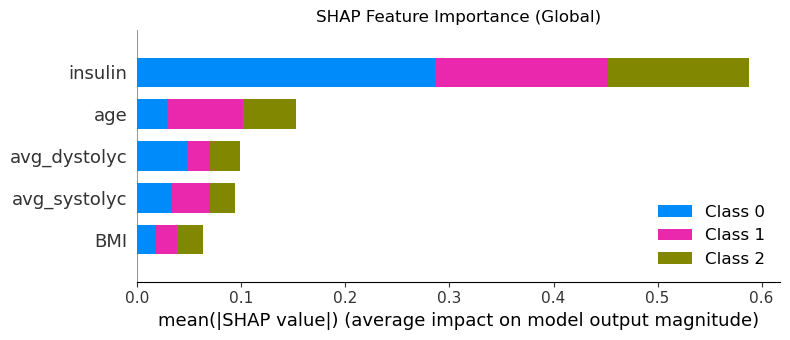

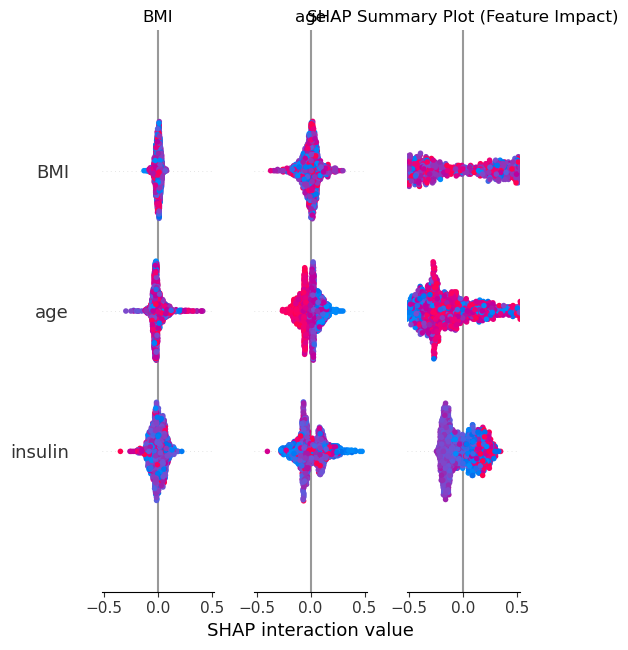

In [24]:
# ===============================================
# RANDOM FOREST + HYPERTUNING + EXPLAINABLE AI (SHAP)
# ===============================================

import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

# ===============================================
# 1. Load Dataset
# ===============================================
df = pd.read_csv("Dataset/data_scaled_gender.csv", delimiter=";")

# ===============================================
# 2. Data Cleaning
# ===============================================
feature_columns = [
    'BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc'
]

print("Memulai pembersihan data untuk Random Forest...")
for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
print("Pembersihan data selesai.\n")

# ===============================================
# 3. Feature & Label
# ===============================================
X = df[feature_columns]
y = df['Status']

# Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# ===============================================
# 4. Random Forest + Hyperparameter Space
# ===============================================
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 25),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 6),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# ===============================================
# 5. Randomized Search CV
# ===============================================
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# ===============================================
# 6. Training & Best Model
# ===============================================
print("Memulai Hyperparameter Tuning untuk Random Forest...")
random_search.fit(X_train, y_train)
print("Tuning selesai!\n")

print("=== Best Hyperparameters ===")
print(random_search.best_params_)

best_rf = random_search.best_estimator_

# ===============================================
# 7. Evaluation
# ===============================================
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\n=== Akurasi ===")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")

print("\n=== Classification Report (Test Data) ===")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

# ===============================================
# 8. Explainable AI (SHAP)
# ===============================================
print("\n=== Explainable AI (SHAP Analysis) ===")

# Inisialisasi SHAP Explainer
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# 🔹 SHAP Summary Plot (global interpretability)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Global)")
plt.tight_layout()
plt.show()

# 🔹 SHAP Beeswarm Plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot (Feature Impact)")
plt.tight_layout()
plt.show()





In [6]:
# ===============================================
# RANDOM FOREST + BAYESIAN OPTIMIZATION
# ===============================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# === 1. Load data ===
df = pd.read_csv("Dataset/data_scaled_gender.csv", delimiter=";")

# === 2. Definisikan fitur & bersihkan data ===
feature_columns = ['BMI', 'age', 'insulin', 'avg_systolyc', 'avg_dystolyc']

print("Memulai pembersihan data untuk Random Forest...")
for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
print("Pembersihan data selesai.\n")

# === 3. Pilih fitur dan label ===
X = df[feature_columns]
y = df['Status']

# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === 4. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# === 5. Definisikan model dan ruang hyperparameter ===
rf = RandomForestClassifier(random_state=42)

search_spaces = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(5, 25),
    'min_samples_split': Integer(2, 11),
    'min_samples_leaf': Integer(1, 6),
    'max_features': Categorical(['sqrt', 'log2', None]),
    'bootstrap': Categorical([True, False])
}

# === 6. BayesSearchCV ===
bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=search_spaces,
    n_iter=30,               # jumlah iterasi pencarian (bisa disesuaikan)
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# === 7. Latih model dengan Bayesian Optimization ===
print("Memulai Bayesian Optimization untuk Random Forest...")
bayes_search.fit(X_train, y_train)
print("Tuning selesai!\n")

# === 8. Evaluasi model terbaik ===
print("=== Best Hyperparameters ===")
print(bayes_search.best_params_)

best_rf = bayes_search.best_estimator_

# 🔹 Prediksi pada data training & testing
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# 🔹 Hitung akurasi training dan testing
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\n=== Akurasi ===")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")

# 🔹 Classification report
print("\n=== Classification Report (Test Data) ===")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))


Memulai pembersihan data untuk Random Forest...
Pembersihan data selesai.

Memulai Bayesian Optimization untuk Random Forest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\ASUS\AppData\Local\Temp\ipykernel_45240\2915525415.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

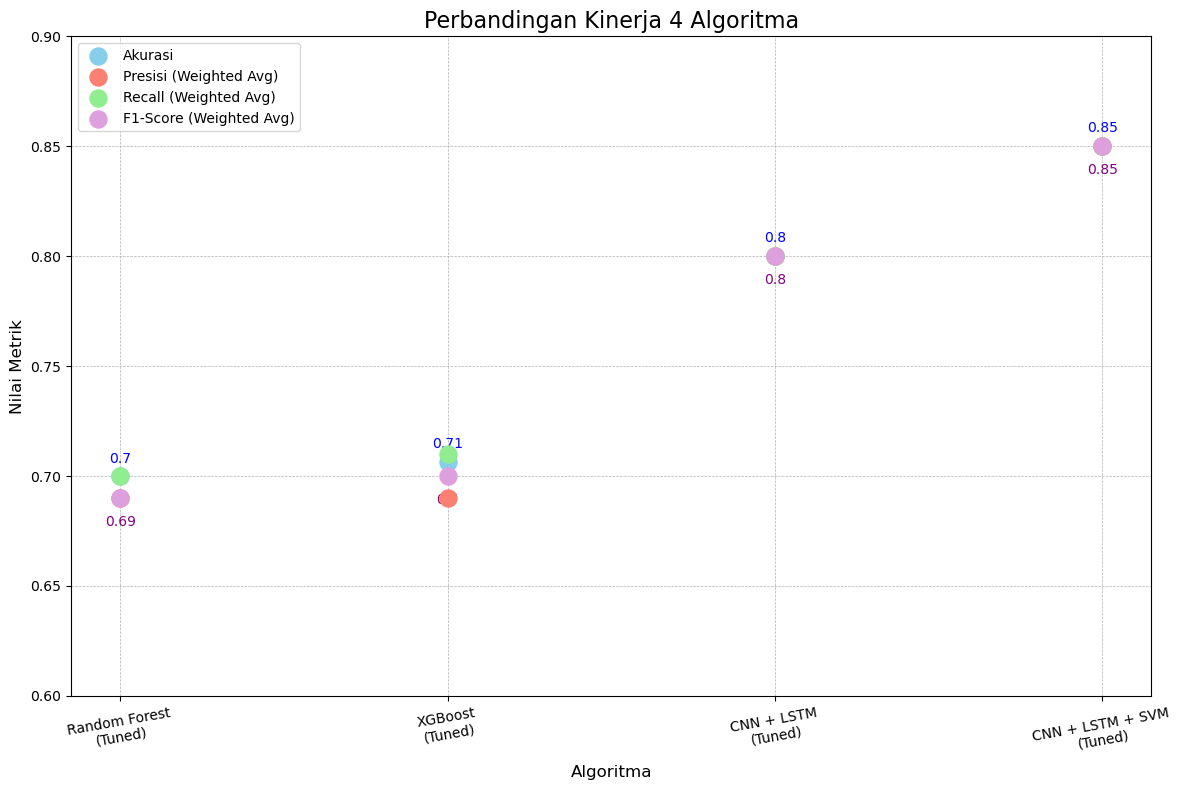

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data dari gambar yang diberikan
algorithms = [
    'Random Forest\n(Tuned)', 
    'XGBoost\n(Tuned)', 
    'CNN + LSTM\n(Tuned)', 
    'CNN + LSTM + SVM\n(Tuned)'
]

accuracy = [0.6998, 0.7063, 0.80, 0.85]
precision = [0.69, 0.69, 0.80, 0.85]
recall = [0.70, 0.71, 0.80, 0.85]
f1_score = [0.69, 0.70, 0.80, 0.85]

# Membuat plot
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot untuk setiap metrik
ax.scatter(algorithms, accuracy, label='Akurasi', color='skyblue', s=150, zorder=5)
ax.scatter(algorithms, precision, label='Presisi (Weighted Avg)', color='salmon', s=150, zorder=5)
ax.scatter(algorithms, recall, label='Recall (Weighted Avg)', color='lightgreen', s=150, zorder=5)
ax.scatter(algorithms, f1_score, label='F1-Score (Weighted Avg)', color='plum', s=150, zorder=5)

# Menambahkan judul dan label
ax.set_title('Perbandingan Kinerja 4 Algoritma', fontsize=16)
ax.set_ylabel('Nilai Metrik', fontsize=12)
ax.set_xlabel('Algoritma', fontsize=12)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)

# Mengatur batas sumbu Y
plt.ylim(0.6, 0.9)

# Menampilkan nilai pada setiap titik
for i, txt in enumerate(accuracy):
    ax.annotate(round(txt, 2), (i, accuracy[i]), textcoords="offset points", xytext=(0,10), ha='center', color='blue')
for i, txt in enumerate(f1_score):
    ax.annotate(round(txt, 2), (i, f1_score[i]), textcoords="offset points", xytext=(0,-20), ha='center', color='purple')

plt.xticks(rotation=10)
plt.tight_layout()
plt.show()